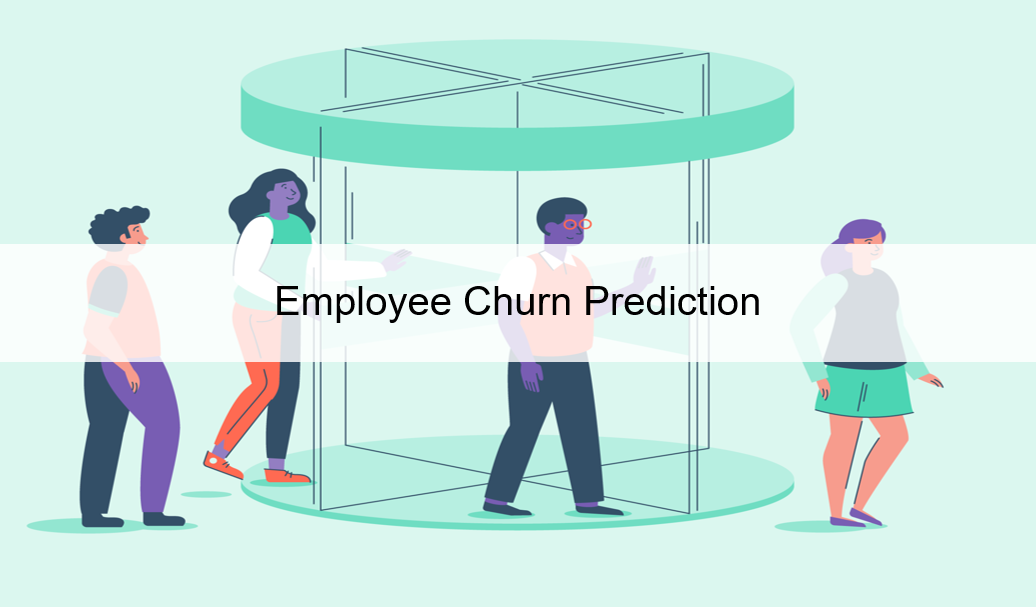

#### Data Goreng - Chen Bao Gang | Ng Boon Jane | Sam Tey | Soo Kar Lok | Yin Khar Shin 

## List of Content

* [Introduction](#Introduction)  
    * [Overview](#Overview)
    * [Research Questions](#Research-Questions)
    * [Research Objectives](#Research-Objectives)
    * [Significance](#Significance)
    * [Motivations](#Motivation)
    * [Related Work](#Related-Work)
* [Methodology](#Methodology)
    * [Dataset Description](#Dataset-Description)
    * [Data Pre-processing Methods](#Data-Pre-processing-Methods)
    * [Machine Learning Algorithms](#Machine-Learning-Algorithms)
* [Data Analysis](#Data-Analysis)
    * [Data Overview](#Data-Overview)
    * [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Data Pre-processing](#Data-Pre-processing)
    * [Data Cleaning](#Data-Cleaning)
    * [Data Integration - Correlation](#Data-Integration---Correlation)
    * [Data Reduction - Principle Component Analysis (PCA)](#Data-Reduction---Principle-Component-Analysis-(PCA))
* [Modelling](#Modelling)
    * [Train Test Split](#Train-Test-Split)
    * [Model Building](#Model-Building)
    * [Model Evaluation](#Model-Evaluation)
    * [Feature Importance](#Feature-Importance)
* [Conclusion](#Conclusion)
* [Future Work](#Future-Work)
* [Reference](#Reference)


---

## Introduction

#### Overview 
Employee is an individual hired by a person or an organization as a part-timer of full-timer to work and complete a specific task, in exchange of wages or salary. According to the Statistics of Labour Force 2022, there is a continuous rise in employment rate compare to previous year, indicating employees are valuable assets to employer or an organization as they have major contribution in the organization’s profits and values (Department of Statistics Malaysia, 2022). However, employees will resign if employee matters are not handled properly. Employee resignation happened due to attrition (retirement, death or health issue), push factors (poor culture and management, overworked or underpay) or pull factors (better pay, more benefits or greater flexibility). Employee resignation is indeed a normal phenomenon but abnormal if resignation happens frequently and organizations will have no clue on what is happening and how to prevent. Prior research emphasises the employee churn is a challenging issue as employee plays an important role in driving the business performance and productivity. Employee resignation can cause negative impacts towards organizations in terms of cost, time and effort. Thus, it would be beneficial if action is taken prior to the employee resignation by accurately focusing on understanding and predicting the employee churn.


#### Research Questions 
- What is the relationship between the factors and employee churn? 

- Which factors most lead to the employee churn? 

- How do the factors help in employee recruitment and detect employee churn? 


#### Research Objectives 
- To determine the relationship between factors and employee churn. 

- To identify the significant factors that causes employee churn. 

- To predict the churner’s characteristics and probability to churn. 


#### Significance
- Benefits to organization's management team, hiring manager and human resource department. 

- Insighful information on the root causes of employee churn and leads towards a better understanding on what causing employee churn. 

- Provide an accuracy indicator to detect potential churner.

- Important guideline for retention effort by enhancing employee policy and improvising retention strategies to reduce employee’s dissatisfaction.

- Act as a tool to alter employee benefits when recruiting and screening on potential talents who is unlikely to resign within a short period of time.


#### Motivation 
Motivations to look into the employee relevant matters: 
1. The Great Resignation [Great Resignation](https://www.cnbc.com/video/2022/03/21/great-resignation-goes-global-and-shakes-up-labor-market-for-good.html#:~:text=The%20term%20Great%20Resignation%20was,economies%20are%20experiencing%20similar%20trends), also known as the Big Quit and the Great Reshuffle, is an ongoing economic trend in which employees have voluntarily resigned from their jobs, beginning in early 2021, primarily in the United States. It started to go global and continues to 2022 where other developed countries are experiencing the same issue, despite labour shortage and high umemployment. Possible causes include wage stagnation amid rising cost of living, long-lasting job dissatisfaction, and safety concerns of the COVID-19 pandemic [Great Resignation Survey](https://www.pewresearch.org/fact-tank/2022/03/09/majority-of-workers-who-quit-a-job-in-2021-cite-low-pay-no-opportunities-for-advancement-feeling-disrespected/#:~:text=The%20COVID%2D19%20pandemic%20set,20%2Dyear%20high%20last%20November). 


2. Frequent employee resignation is happenning among our workplace. 


#### Related Work
A comparison table of previous research studies on employee churn prediction which consists of methodology and contributing factor that causes employee atrition with author, title and published year. [Literature review](https://drive.google.com/file/d/13x8fZyY79CsjMEUS9Q7IqJaUNeiHdV0l/view?usp=sharing)

-----

## Methodology 

#### Dataset Description

- Retrieved from Kaggle [IBM Human Resource Data](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- A fictional data set created by IBM data scientists that contains a total of 1471 records with 34 independent variables and 1 dependent variable 

#### Data Analysis
- Univariate, Bivariate and Multivariate Analysis
- Visualization: Histogram, Boxplot, Barplot

#### Data Pre-processing Methods
- Data Cleaning: Drop and replace
- Data Integration: Correlation - check the relationship between variables
- Data Transformation: Label Encoding - convert the labels into a numeric form so as the machine-readable form. **Different from One-Hot Encoding, which is the process of creating dummy variables.
- Data Reduction: Principle Component Analysis (PCA)

#### Model Building
- Train test split 
- Machine Learning: Logistic Regression, Random Forest, Decision Tree 
- K fold cross validation

#### Model Evaluation 
- Accuracy, Confusion Matrix, Feature Importance

---

### Data Analysis
#### Data Overview

#### <a style="color:blue;">Import libraries</a>

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm

#### <a style="color:blue;">Import dataset and set 'EmployeeNumber' as index. 'EmployeeNumber' is removed as variable because it represents an employee identity.</a>

In [297]:
dataset = pd.read_csv('Dataset - IBM HR Employee Attrition.csv')
dataset = dataset.set_index(dataset['EmployeeNumber'])
dataset = dataset.drop(columns = 'EmployeeNumber')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert Attrition to numerical label - Yes indicates 1 and No indicates 0</a>

In [298]:
dataset['Attrition'] = dataset['Attrition'].replace(to_replace=['Yes', 'No'], value=[1, 0])
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


#### <a style="color:blue;">Dataset overview</a>
There are 1470 records (rows) and 34 attributes (columns). Dataset are mostly made up of numerical value (int64) and categorical value (object). Statistics are provided for numerical variables only. 

In [299]:
print ("Total rows & columns: " , dataset.shape, '\n') 
dataset.info()

Total rows & columns:  (1470, 34) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   

In [300]:
dataset.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### <a style="color:blue;">Exploratory Data Analysis (EDA)</a>

1. Attrition value 
- This is an imbalanced dataset. 

In [301]:
dataset['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

2. Declare Variables

In [302]:
#Target 
target = ['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical_val = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical_val = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
numerical_df = dataset[numerical_val]
categorical_df = dataset[categorical_val] #addin attrition value 
categorical_df.insert(0, 'Attrition', dataset['Attrition'])

3. Distribution Checking
- Numerical boxplot

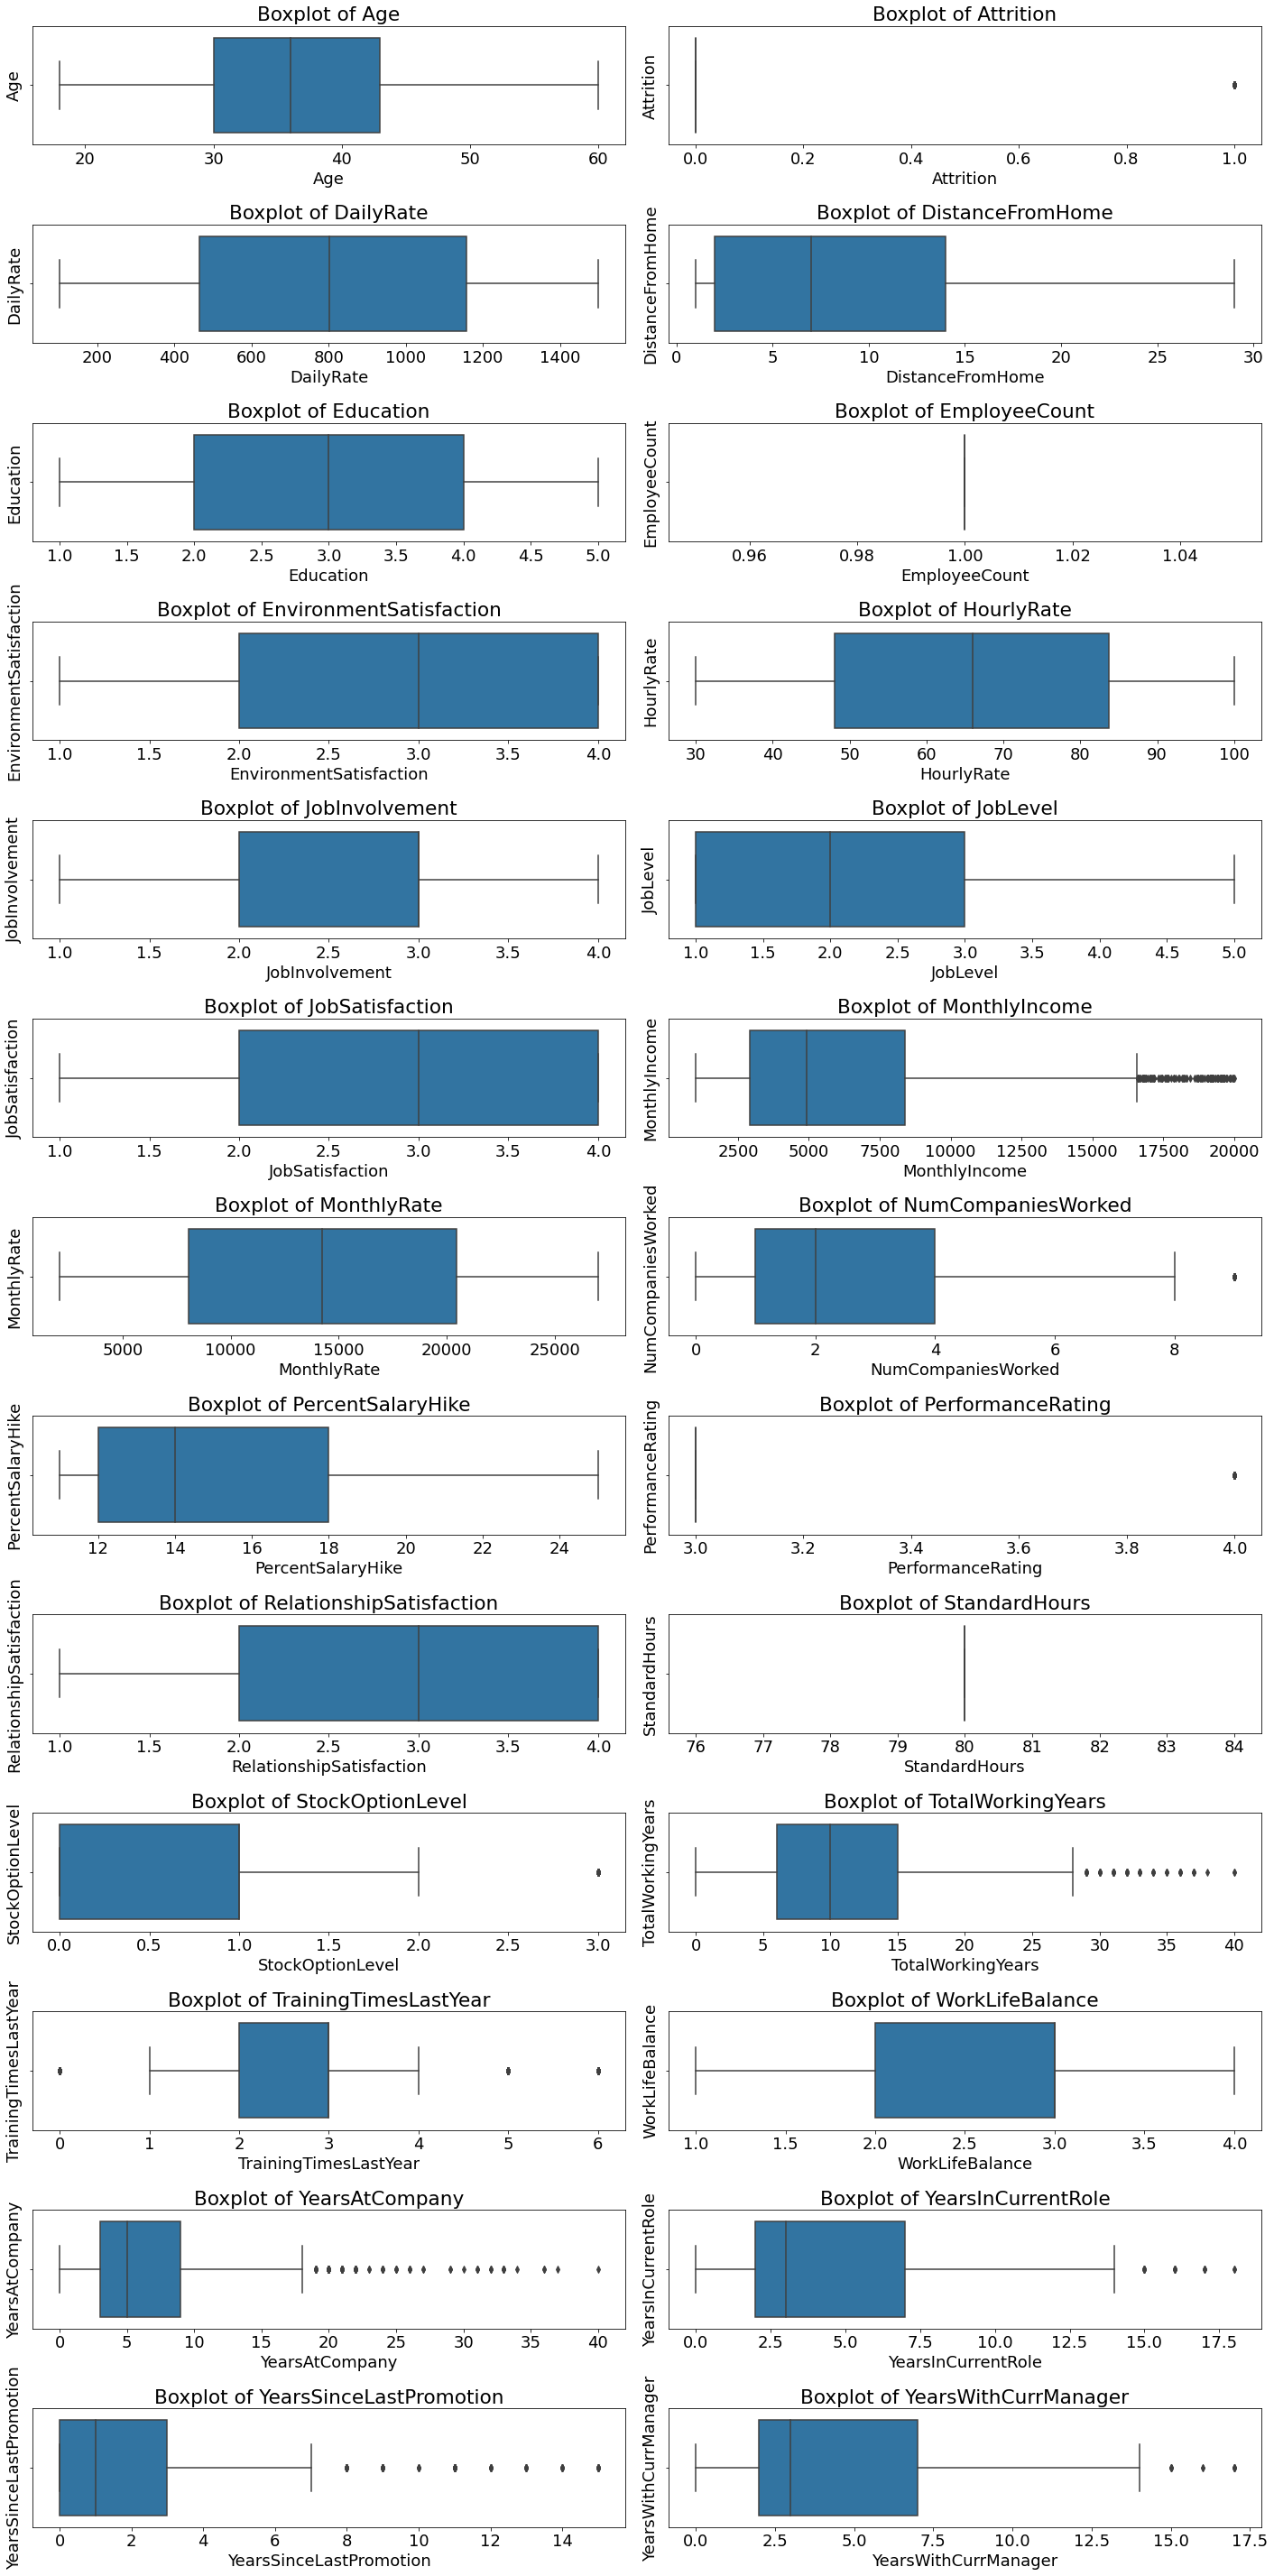

In [303]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel=k, ylabel=k)
        ax[i, j].set(title='Boxplot of '+k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

- Categorical histogram

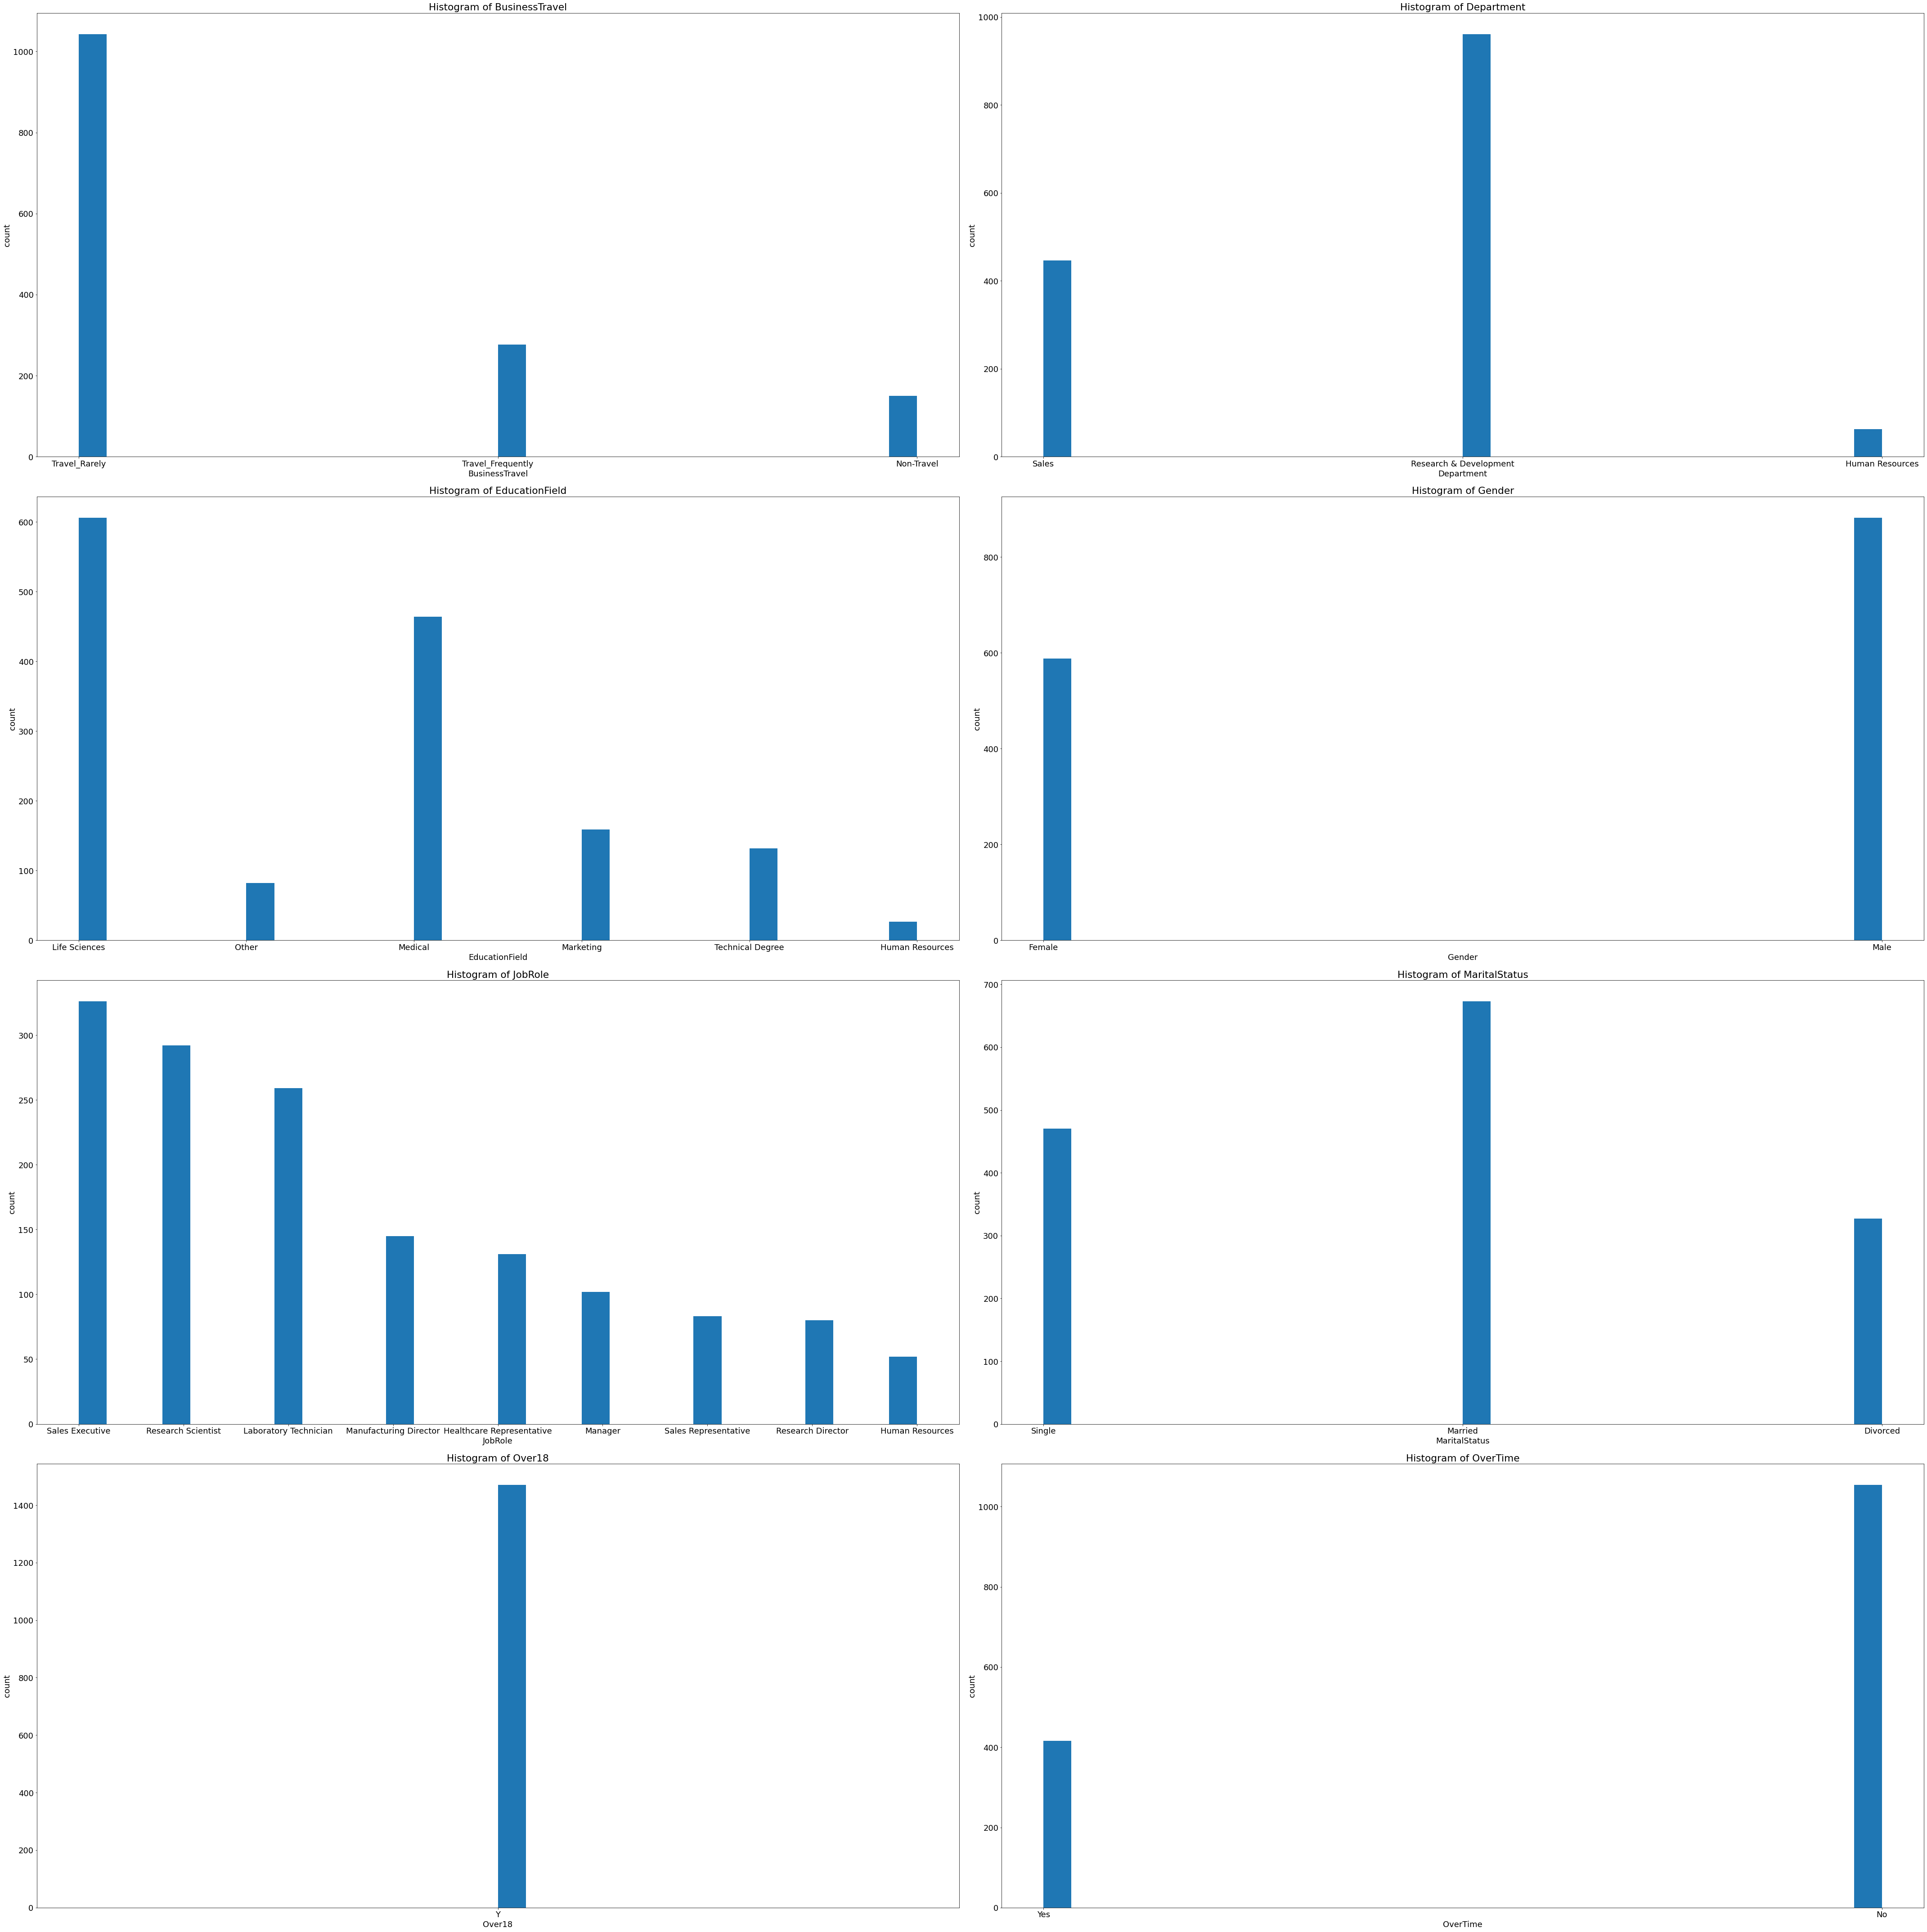

In [304]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(4,2, figsize=(60,60))

categorical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = categorical_val[categorical_var_count]

        ax[i, j].hist(categorical_df[x],bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].set(title='Histogram of '+x)
        categorical_var_count = categorical_var_count + 1
        
plt.tight_layout()

| Variable | Incomplete Data | Noisy Data | Inconsistent Data | Intentional Data | Meaningless Data |
| --- | --- | --- | --- | --- | --- |
|Age	|No	|No	|No	|No	|No|
|Attrition	|No	|No	|No	|No	|No|
|DailyRate	|No	|No	|No	|No	|No|
|DistanceFromHome	|No	|No	|No	|No	|No|
|Education	|No	|No	|No	|No	|No|
|EmployeeCount	|No	|No	|No	|**Yes**	|**Yes**|
|EnvironmentSatisfaction	|No	|No	|No	|No	|No|
|HourlyRate	|No	|No	|No	|No	|No|
|JobInvolvement	|No	|No	|No	|No	|No|
|JobLevel	|No	|No	|No	|No	|No|
|JobSatisfaction	|No	|No	|No	|No	|No|
|MonthlyIncome	|No	|**Yes**	|No	|No	|No|
|MonthlyRate	|No	|No	|No	|No	|No|
|NumCompaniesWorked	|No	|**Yes**	|No	|No	|No|
|PercentSalaryHike	|No	|No	|No	|No	|No|
|PerformanceRating	|No	|**Yes**	|No	|No	|No|
|RelationshipSatisfaction	|No	|No	|No	|No	|No|
|StandardHours	|No	|No	|No	|**Yes**	|**Yes**|
|StockOptionLevel	|No	|**Yes**	|No	|No	|No|
|TotalWorkingYears	|No	|**Yes**	|No	|No	|No|
|TrainingTimesLastYear	|No	|**Yes**	|No	|No	|No|
|WorkLifeBalance	|No	|No	|No	|No	|No|
|YearsAtCompany	|No	|**Yes**	|No	|No	|No|
|YearsInCurrentRole	|No	|**Yes**	|No	|No	|No|
|YearsSinceLastPromotion	|No	|**Yes**	|No	|No	|No|
|YearsWithCurrManager	|No	|**Yes**	|No	|No	|No|
|BusinessTravel	|No	|No	|No	|No	|No|
|Department	|No	|No	|No	|No	|No|
|EducationField	|No	|No	|No	|No	|No|
|Gender	|No	|No	|No	|No	|No|
|JobRole	|No	|No	|No	|No	|No|
|MaritalStatus	|No	|No	|No	|No	|No|
|Over18	|No	|No	|No	|**Yes**	|**Yes**|
|OverTime	|No	|No	|No	|No	|No|


The table summarized the variables are either incomplete, noisy, inconsistent, intentional or meaningless.
It can be observed that majority of the variables are normal and good for further analysis.

#### Descriptive and Exploratory Analysis

1. Numerical Histogram
- Univariate Analysis
- To explore the numerical variable distributions. 

**It can be observed that:**
- Most of the employees' age are between 30 and 40. 
- Most of them stay near to the company.
- Majority are having a monthly income between 2500 and 5000. 
- Most of them worked for 5 to 10 years, yet majority worked for 10 years. 

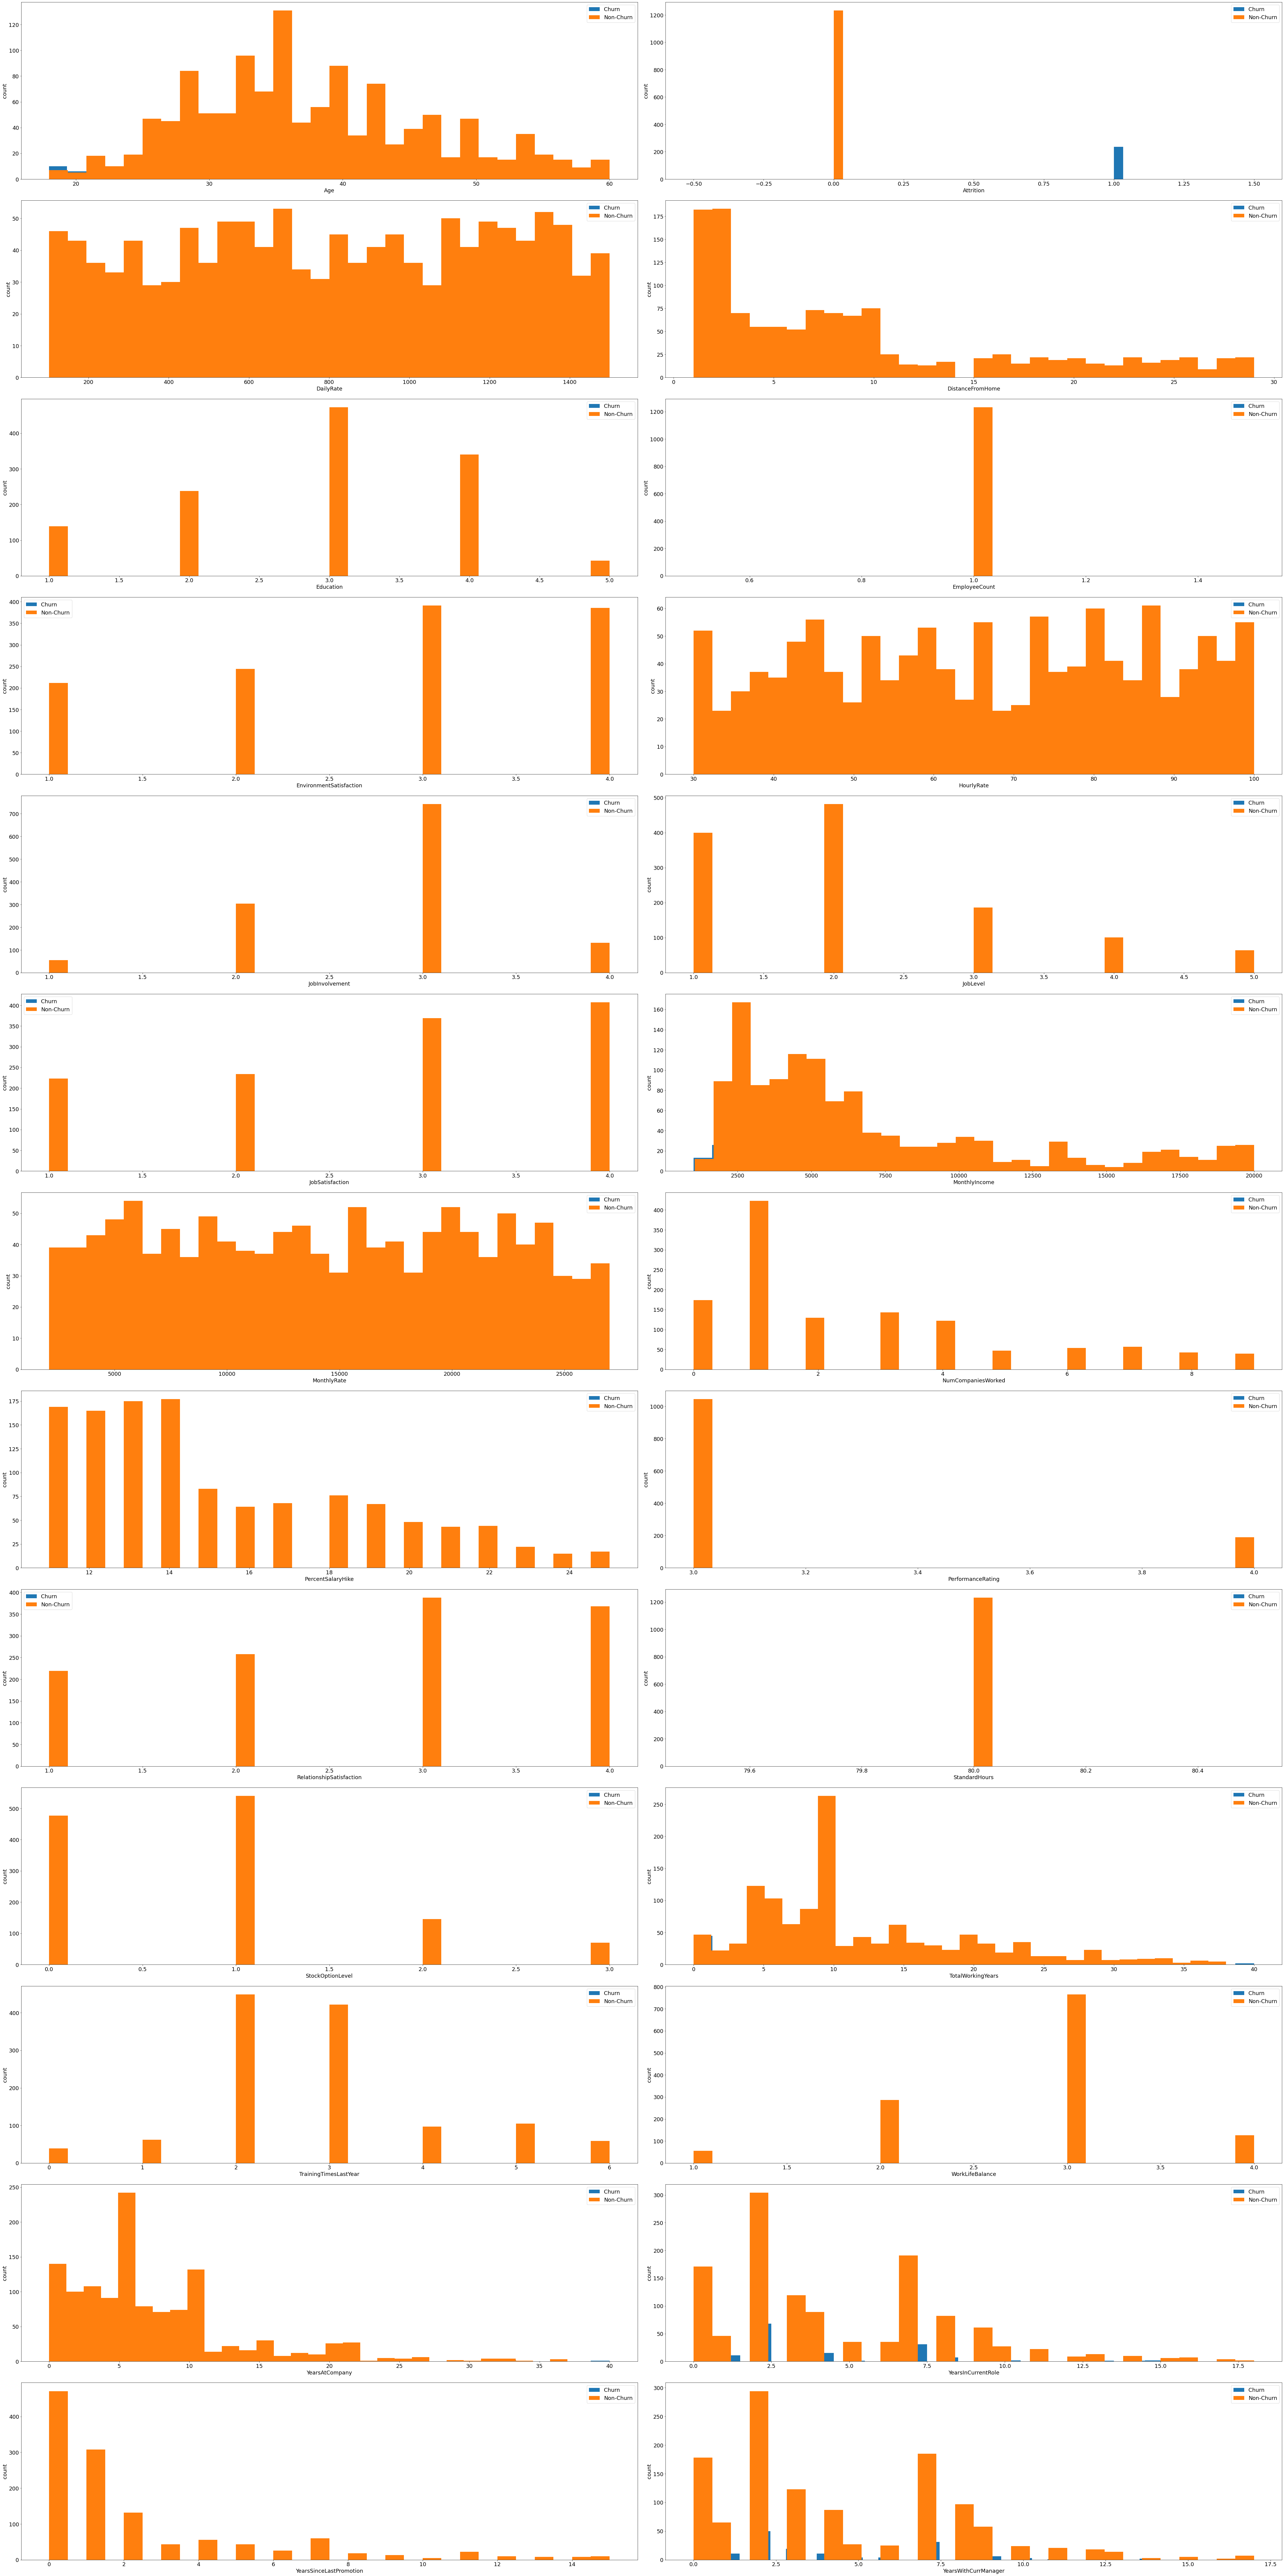

In [305]:
fig , ax = plt.subplots(13,2, figsize=(60,120))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = numerical_val[numerical_var_count]

        ax[i, j].hist(numerical_df[numerical_df[target[0]]==1][x],label='Churn',bins=30)
        ax[i, j].hist(numerical_df[numerical_df[target[0]]==0][x],label='Non-Churn',bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].legend()
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

2. Numerical Boxplot
- Bivariate Analysis 
- To explore the numerical variable outliers and the relationships of the attributes.
- It can be observed that there are outliers in Age, JobLevel, NumberCompaniesWorked, PercentSalaryHike, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 

**Observation:**
- **Churners are younger.** Younger generation tends to be more frequent in job-hopping compared to older generation as there are more working opportunities in the industry nowadays. 
- **Churners tend to stay far away from company.** The individual might not think of to find a place which nearner to company, in order to reduce commute and less traffic.
- **Churners tend to work for more companies.** This may reflect that the individual has a more challenging attitude as they want to explore different opportunities with different company.
- **Churners tend to have a low job level with low monthly income.** They are more likely **not satisfied to the job** but shorter working hours. Hence, they have a **shorter tenure in company, with manager and current role.** 

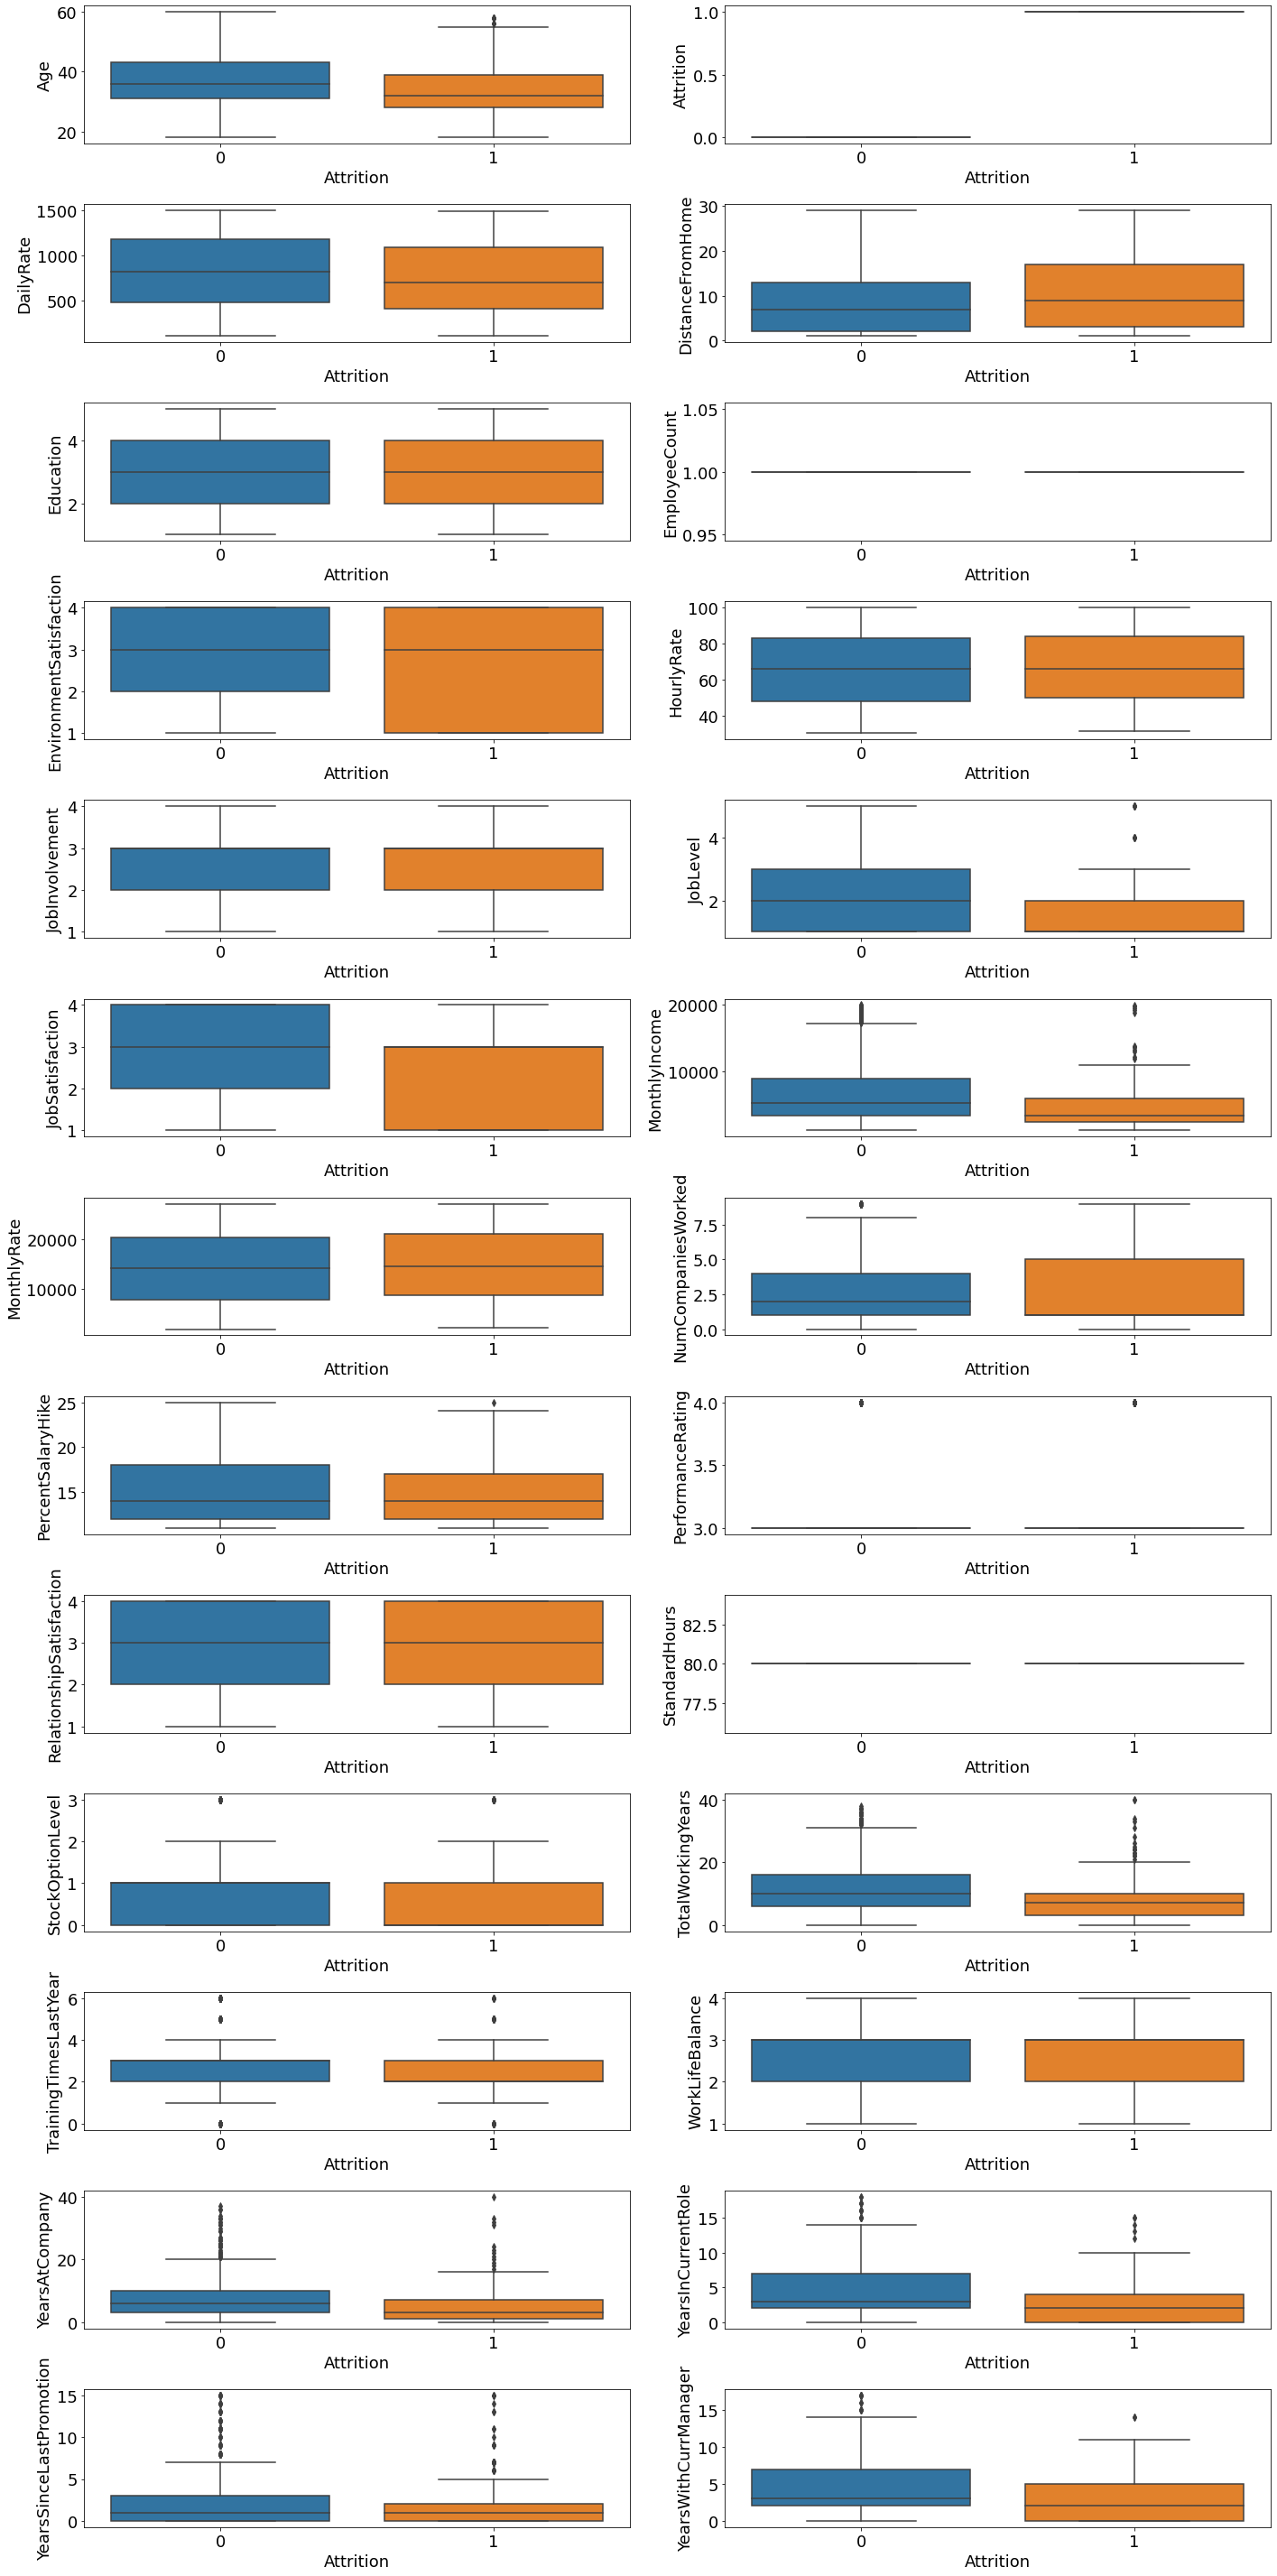

In [306]:
fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df['Attrition'], y=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel='Attrition', ylabel=k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

3. Categorical Barplot 
- Univariate analysis
- To explore the categorical variable distribution. 

**Observation:**
- Majority of the employee rarely travel and no overtime. 
- Most of the employee are from researtch & development department. The employees are mostly come from life sciences, followed by other, medical then marketing, technical degree and human resource. 
- Most of the employee are male. 
- Minority of the employee are still single. 

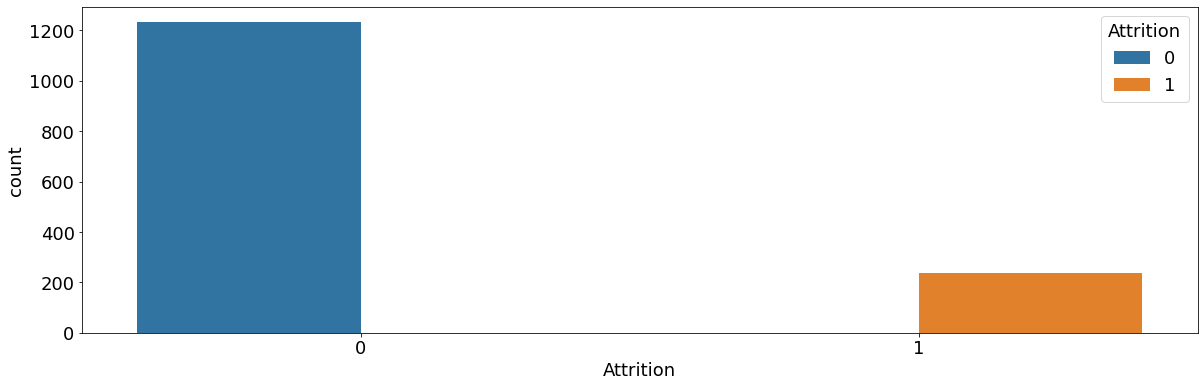

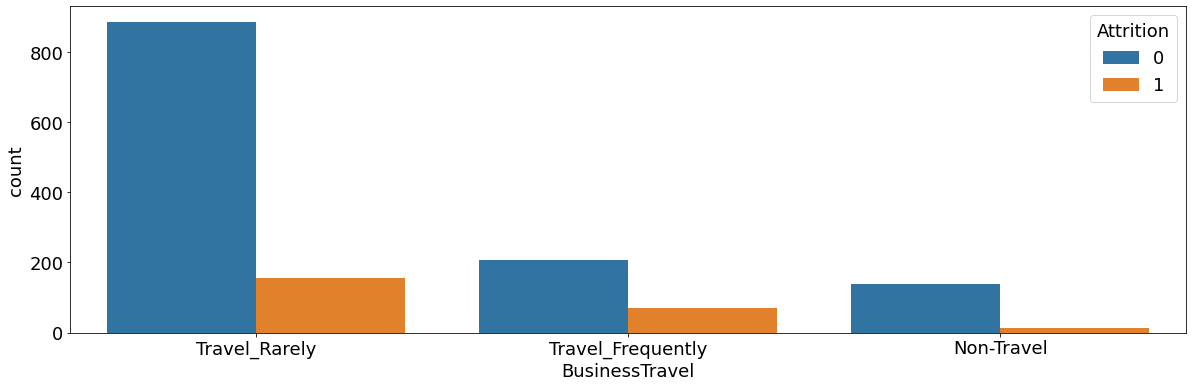

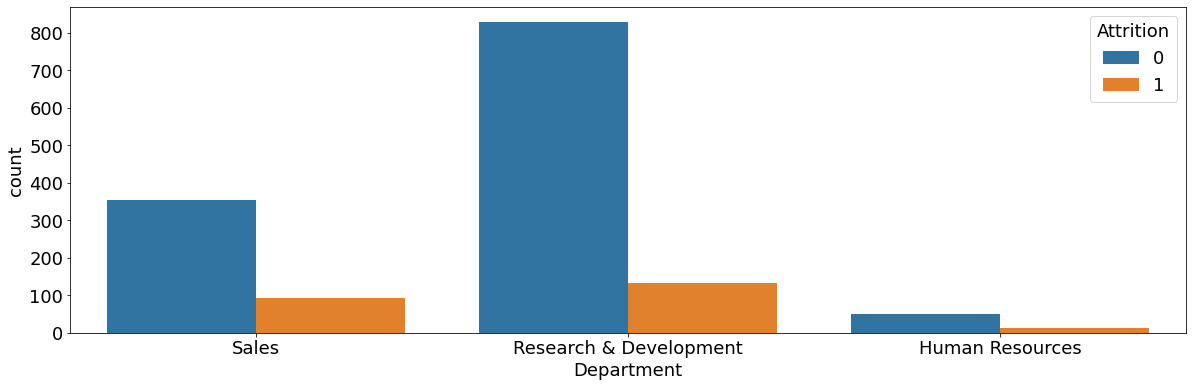

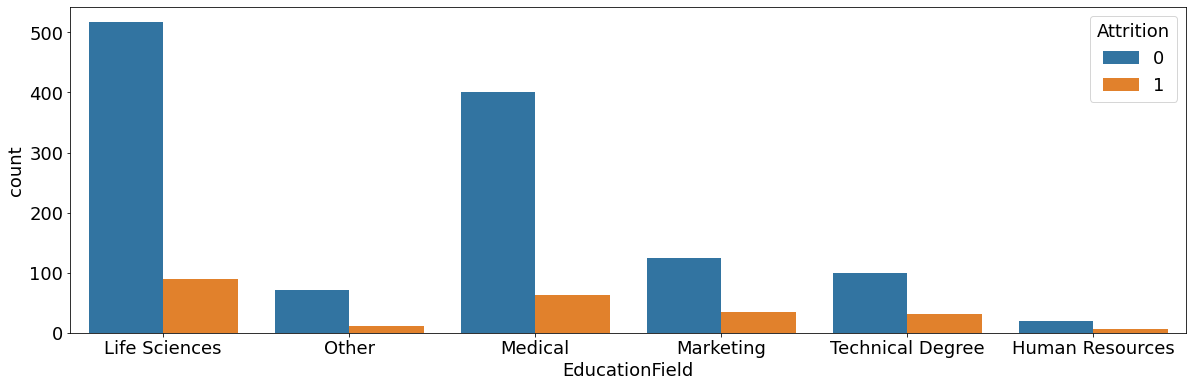

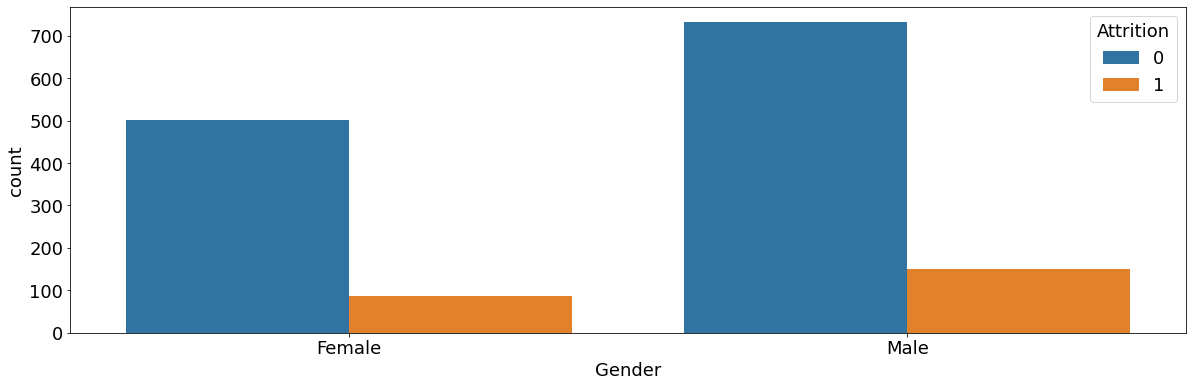

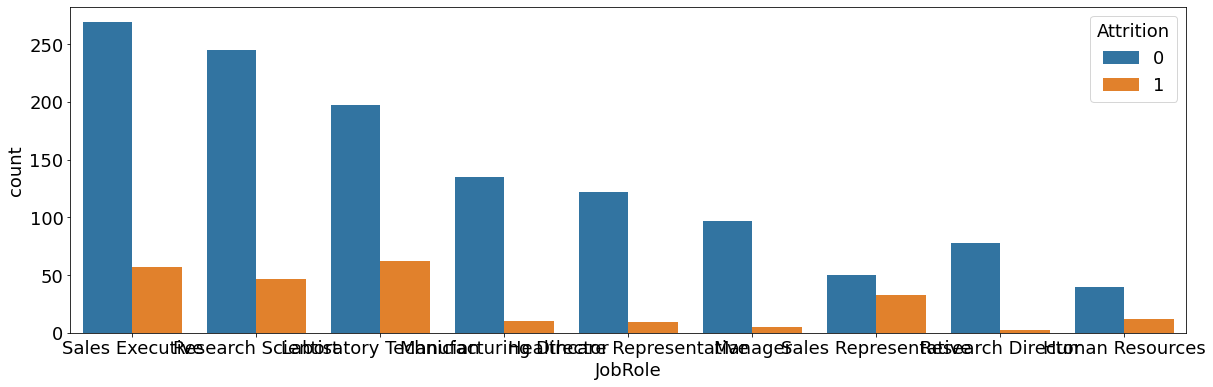

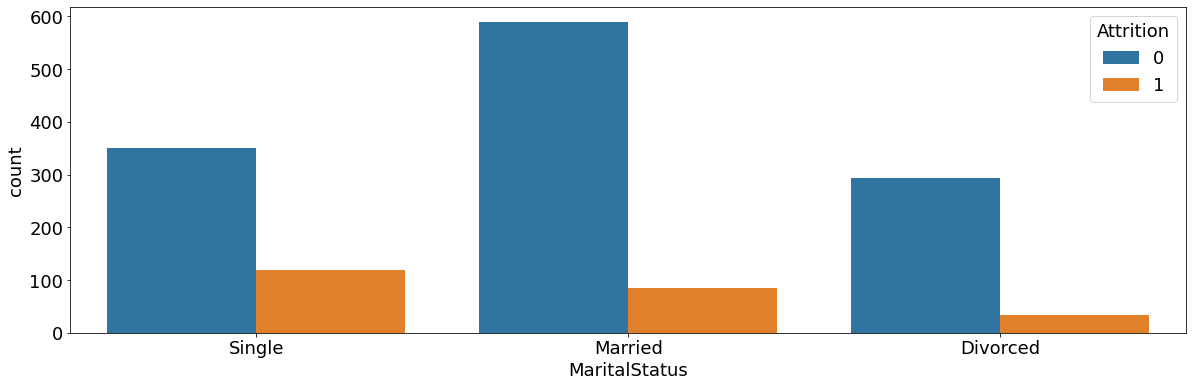

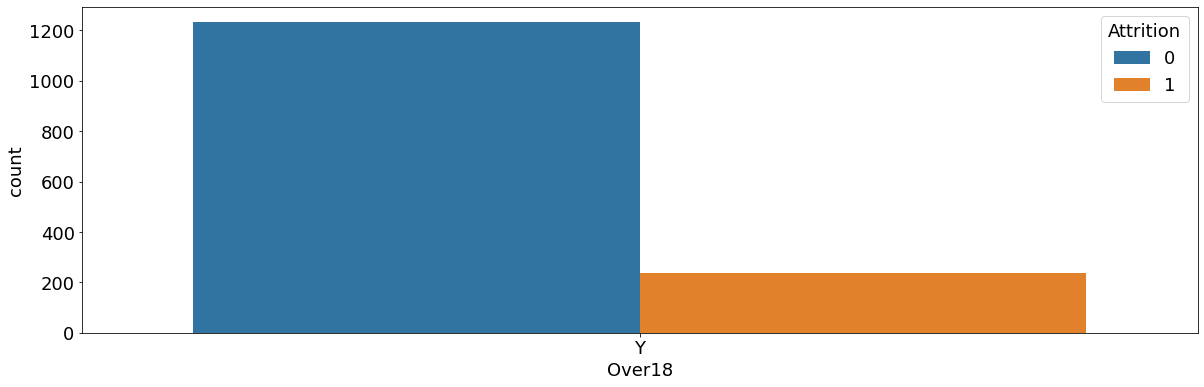

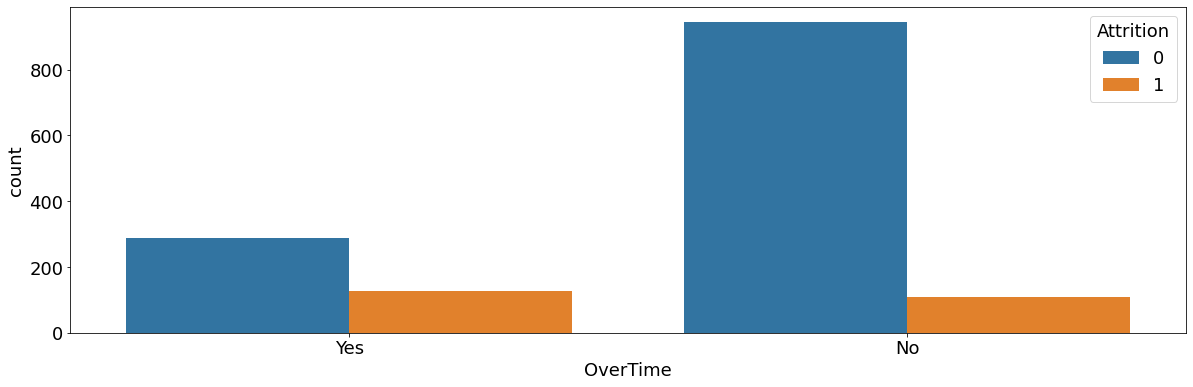

In [307]:
for i, col in enumerate(categorical_df):
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, hue="Attrition", data=categorical_df)

4. Scatterplot
- To explore multivariate analysis.

**Observation:**
- The longer the working years in company, the higher the job level, and the higher the monthly income. 
- Employees' performance rating affect the percentage of salary hike. It does not related with the employees' age and education. 
- The longer the working years in company, the longer the tenure in current role and company. It shows that the employee will have a better relationship with current manager. 
- Overtime do affect the employee to consider resign or not regardless of age.

5. Hypothesis Testing

**To find the independent variarbles that significant in predicting dependent variable**

H0 = The independent variables is not significant in predicting dependent variable

H1 = The independent variables is significant in predicting dependent variable

Based on the result below, p-value of joint significant test is 2.95e-33, shows that the independent variables are statistical significant. 

Observation of each independent variables, the variables that are statistical significant are:-
01. Age
02. DistanceFromHome
03. EmployeeCount
04. EnvironmentSatisfaction
05. JobInvolvement
06. JobSatisfaction
07. NumCompaniesWorked
08. RelationshipSatisfaction
09. StandardHours
10. StockOptionLevel
11. TrainingTimesLastYear
12. WorkLifeBalance
13. YearsInCurrentRole
14. YearsSinceLastPromotion
15. YearsWithCurrManager

In [308]:
#Target 
target = ['Attrition']

xs = dataset[numerical_val].drop(columns = 'Attrition')
y = dataset[target]

xs = sm.add_constant(xs)
model = sm.OLS(y, xs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     10.04
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.95e-33
Time:                        11:28:11   Log-Likelihood:                -506.40
No. Observations:                1470   AIC:                             1061.
Df Residuals:                    1446   BIC:                             1188.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0039      0.001     -2.743      0.006      -0.007      -0.001
DailyRate                -3.351e-05   2.25e-05     -1.492      0.136   -7.76e-05    1.06e-05
DistanceFromHome             0.0039      0.001      3.456      0.001       0.002       0.006
Education                   -0.0010      0.009     -0.110      0.913      -0.019       0.017
EmployeeCount                0.0001   1.99e-05      7.302      0.000       0.000       0.000
EnvironmentSatisfaction     -0.0351      0.008     -4.250      0.000      -0.051      -0.019
HourlyRate                  -0.0002      0.000     -0.525      0.600      -0.001       0.001
JobInvolvement              -0.0620      0.013     -4.871      0.000      -0.087      -0.037
JobLevel                    -0.0237      0.027     -0.871      0.384      -0.077       0.030
JobSatisfaction             -0.0347      0.008     -4.230      0.000      -0.051      -0.019
MonthlyIncome            -1.226e-06   6.27e-06     -0.196      0.845   -1.35e-05    1.11e-05
MonthlyRate               6.207e-07   1.27e-06      0.489      0.625   -1.87e-06    3.11e-06
NumCompaniesWorked           0.0143      0.004      3.547      0.000       0.006       0.022
PercentSalaryHike           -0.0043      0.004     -1.105      0.269      -0.012       0.003
PerformanceRating            0.0305      0.039      0.774      0.439      -0.047       0.108
RelationshipSatisfaction    -0.0175      0.008     -2.091      0.037      -0.034      -0.001
StandardHours                0.0117      0.002      7.302      0.000       0.009       0.015
StockOptionLevel            -0.0551      0.011     -5.184      0.000      -0.076      -0.034
TotalWorkingYears           -0.0031      0.003     -1.231      0.219      -0.008       0.002
TrainingTimesLastYear       -0.0166      0.007     -2.372      0.018      -0.030      -0.003
WorkLifeBalance             -0.0289      0.013     -2.258      0.024      -0.054      -0.004
YearsAtCompany               0.0060      0.003      1.906      0.057      -0.000       0.012
YearsInCurrentRole          -0.0110      0.004     -2.688      0.007      -0.019      -0.003
YearsSinceLastPromotion      0.0117      0.004      3.235      0.001       0.005       0.019
YearsWithCurrManager        -0.0119      0.004     -2.844      0.005      -0.020      -0.004
==============================================================================
Omnibus:                      342.459   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.241
Skew:                           1.496   Prob(JB):                    5.63e-135
Kurtosis:                       4.069   Cond. No.                     2.25e+19
==============================================================================

Note

### Data Pre-processing
#### Data Cleaning

#### <a style="color:blue;">Missing value</a>
- There is no missing value in the dataset.

In [309]:
#Missing values in dataset
print ("\nMissing values: ", dataset.isnull().sum().values.sum())

#Missing values details
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_values = pd.DataFrame({'column_name': dataset.columns,'percent_missing': percent_missing})
missing_values.sort_values('percent_missing', ascending = False, inplace=True)
print ("\nMissing values for each variables: ", missing_values)


Missing values:  0

Missing values for each variables:                                         column_name  percent_missing
Age                                            Age              0.0
StandardHours                        StandardHours              0.0
NumCompaniesWorked              NumCompaniesWorked              0.0
Over18                                      Over18              0.0
OverTime                                  OverTime              0.0
PercentSalaryHike                PercentSalaryHike              0.0
PerformanceRating                PerformanceRating              0.0
RelationshipSatisfaction  RelationshipSatisfaction              0.0
StockOptionLevel                  StockOptionLevel              0.0
Attrition                                Attrition              0.0
TotalWorkingYears                TotalWorkingYears              0.0
TrainingTimesLastYear        TrainingTimesLastYear              0.0
WorkLifeBalance                    WorkLifeBalance         

#### <a style="color:blue;">Meaningless value</a>
- To check and drop unecessary columns: Over18, EmployeeCount, StandardHours
- These columns displayed the same value for each records.

**Definition:**

* EmployeeNumber indicates the identity of employee in the company.
* Over18 indicates the age of employee in the company must be over 18 years old. 
* EmployeeCount indicates the count of unique employee in the company. 
* StandardHours indicates the standard working hours (80 hours) of employee in the company.

In [310]:
dataset.drop(['Over18','EmployeeCount','StandardHours'],axis='columns',inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert OverTime to numerical label - Yes indicates 1 and No indicates 0</a>

In [311]:
dataset.OverTime.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Data Integration - Correlation

#### <a style="color:blue;">Correlation Matrix Heatmap</a>
- Numerical variables only

**It can be observed that:** 
- The higher the job level, the higher the monthly income. 
- The higher the job level, the longer the total working years. 
- The longer the total working years, the higher the monthly income.
- The higher the performance rating , the higher the percent salary hike.
- The longer the years at company, the longer the years in current role. 
- The longer the years at company, the longer the years with current manager. 
- The longer the years with current manager, the longer the years in current role.  

<AxesSubplot:>

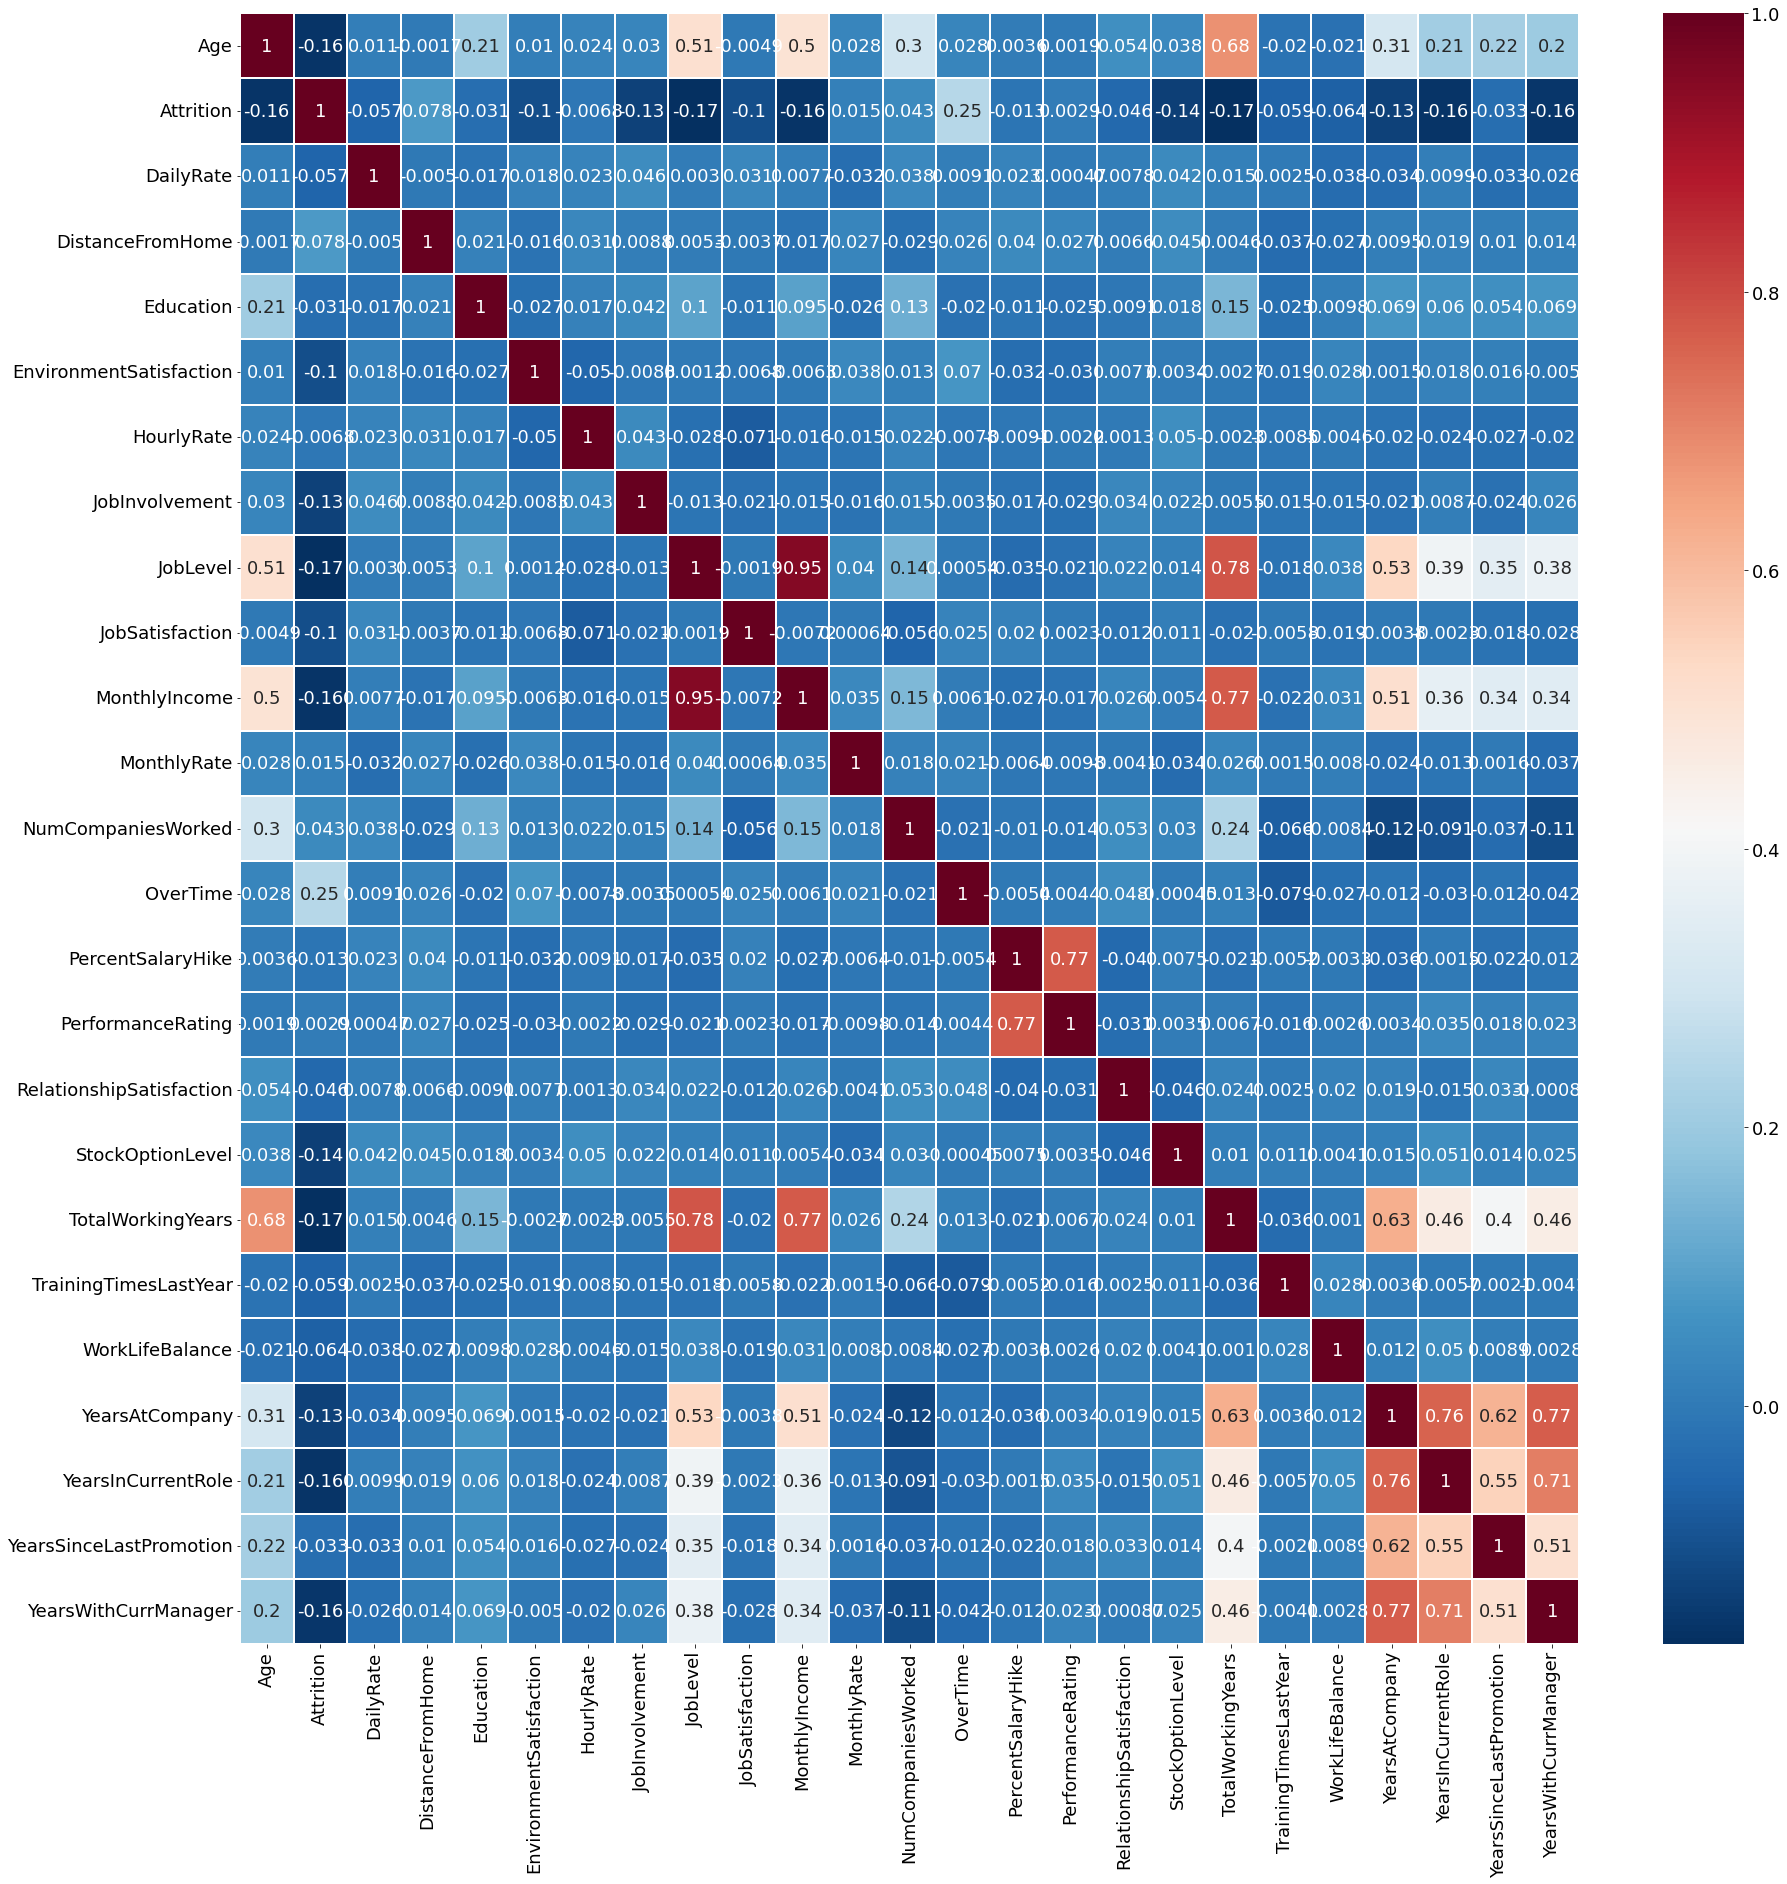

In [312]:
#Correlation Matrix 
#df_numerics_only = dataset.select_dtypes(include=np.number)
#df_numerics_only.corr()

#Correlation Matrix Heatmap
pearsoncorr = dataset.corr(method='pearson')
pearsoncorr = pearsoncorr[((pearsoncorr >= .5) | (pearsoncorr <= -.5)) & (pearsoncorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(method='pearson'), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.4)

#### <a style="color:blue;">Correlation Matrix Heatmap (Correlation > +-0.8)</a>
- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.8 or -0.8. 

Correlation > 0.8: 


JobLevel         0.9503
MonthlyIncome    0.9503
dtype: float64

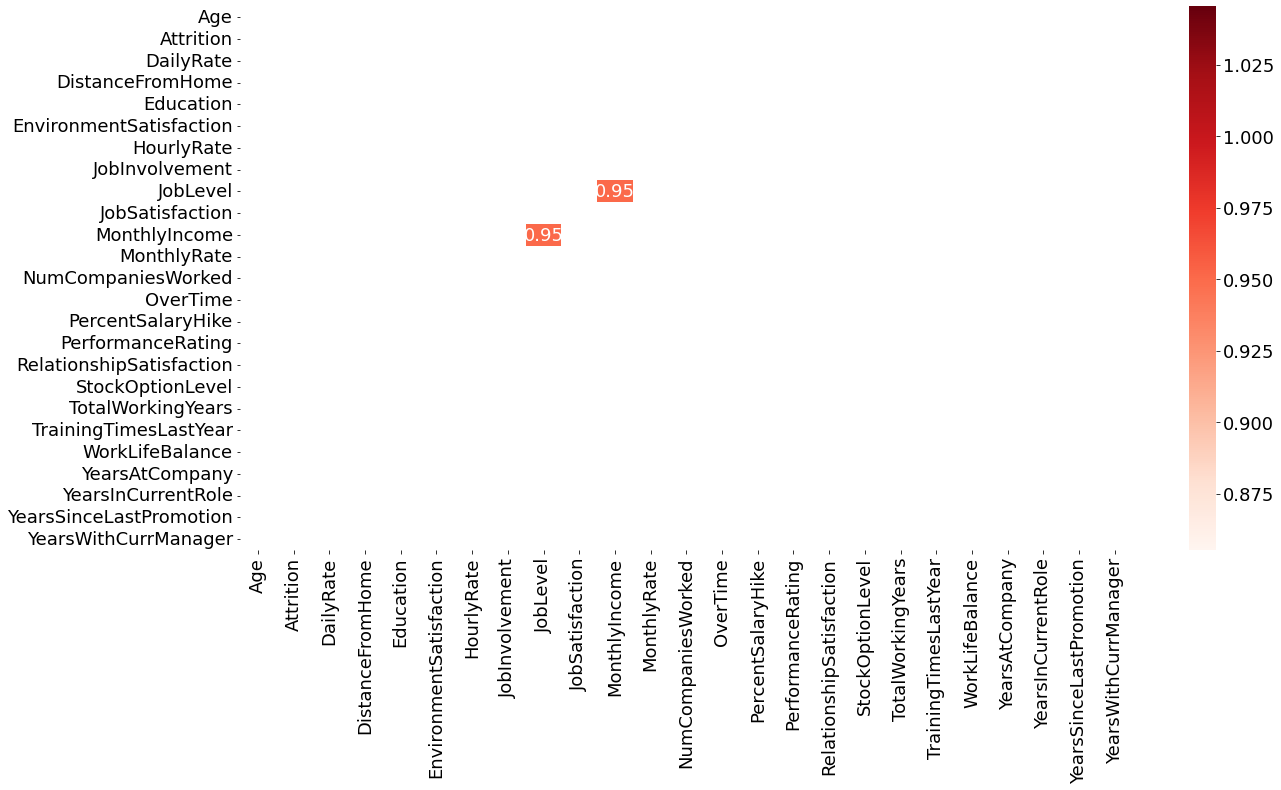

In [313]:
corr = dataset.corr().abs()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
print("Correlation > 0.8: ")
display(corr_cols[corr_cols > 0.8])

dfCorr = dataset.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [314]:
#### <a style="color:blue;">ScatterPlot (Correlation > +-0.7)</a>
#- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.7 or -0.7. 
#g = sns.PairGrid(dataset, vars=['MonthlyIncome', 'YearsWithCurrManager', 'JobLevel','TotalWorkingYears',
#                                'PerformanceRating','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole'
#                                ],hue='Attrition', palette='RdBu_r')
#g.map(plt.scatter, alpha=0.8)
#g.add_legend();

#### Data Reduction - Principle Component Analysis (PCA)
- Principal Component Analysis (PCA) is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### <a style="color:blue;">Dataset are seperated into numerical and categorical.</a>

In [315]:
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64' and i != 'Attrition']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#### <a style="color:blue;">Label encoding is applied to categorical variable.</a>
- Not using one hot encoding because the categorical are not ranked in order.

In [316]:
dataset_cat_encoded = pd.get_dummies(dataset[categorical], columns= [i for i in dataset[categorical].columns if dataset[categorical][i].dtypes=='object'],drop_first=False)

#### <a style="color:blue;">Merge numerical and categorical.</a>

In [317]:
dataset_encoded = pd.merge(dataset[numerical], dataset_cat_encoded, left_index=True, right_index=True, how="left")
dataset_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [318]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_encoded))
dataset_scaled.columns = dataset_encoded.columns.values
dataset_scaled.index = dataset_encoded.index.values
dataset_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
2,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
5,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
7,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565


#### <a style="color:blue;"> Fit standardized data into PCA.</a>

In [319]:
pca = PCA(n_components = 25) 
pca_fit = pca.fit_transform(dataset_scaled) 

#### <a style="color:blue;">Explained Variance Ratio</a>
- The percentage of variance that is attributed by each of the selected components. Ideally, number of components to include in the model by adding the explained variance ratio of each component till around 0.8 or 80% to avoid overfitting.
- Based on the cumulative variance plot, the optimal number of components is 25. Meaning, 25 features are required to explain the model correctly. Data dimentionality could be reduced from 50 to 25. 

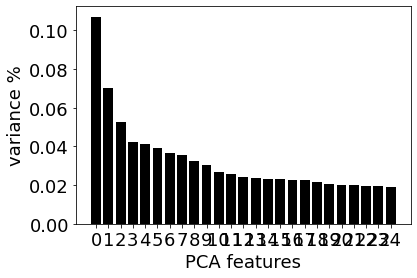

In [320]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features) 
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

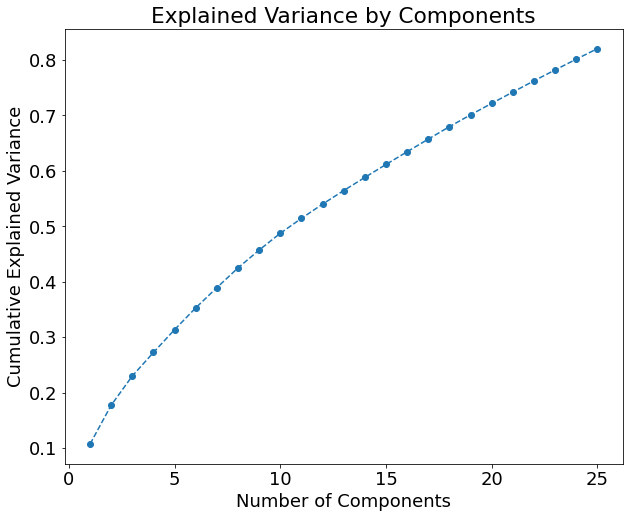

In [321]:
#Decide how many feature to keep based on the cumulative variance plot. Optimal 25 variables or variance >80%
plt.figure(figsize=(10, 8))
plt.plot(range(1,26), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance' )

#### <a style="color:blue;">Important features based on PCA</a>
- Principal component of 1st, 2nd, 5th, 6th, 7th: 
    * Weak correlation with respective original variables. 
    * These criterias do not vary together. If one increases, then the remaining ones remain unchange.

- Principal component of 3rd: Correlated with Job role and Department (HR).
- Principal component of 4th, 10th: Correlated with Marital status (single, divorced).
- Principal component of 8th: Correlated with increasing Percent salary hike and performance rating. 
- Principal component of 9th: Correlated with Education field (Medical).

In [322]:
pca = PCA(n_components = 25) 
pca.fit(dataset_scaled) 
df_pca = pca.transform(dataset_scaled)

#Get the most important features, to understand which features are important for that component 
def create_importance_dataframe(pca, Y):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)
    
    # Assign columns
    importance_df.columns = Y.columns
    
    # Change to absolute values
    # importance_df =importance_df.apply(np.abs)
    
    # Transpose
    importance_df=importance_df.transpose()
    
    # Change column names again
    ## First get number of pcs
    num_pcs = importance_df.shape[1]
    
    ## Generate the new column names
    new_columns = [i for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df
   
# Call function to create importance df
importance_df = create_importance_dataframe(pca, dataset_scaled)

# Show first few rows
display(importance_df.head())

# Top 10 for PC 1 - PC 20
for i in importance_df.columns:
    top_10_features = importance_df[i].sort_values(ascending = False)[:10]
    print(), print(f'pc{i}_top_10_featuress are \n'.format(i=i))
    display(top_10_features)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Age,0.258199,-0.065041,0.046957,0.009774,-0.156497,0.118459,0.165543,0.058382,-0.051310,-0.043363,...,0.003334,-0.092329,-0.061735,-0.040209,-0.067323,0.020874,-0.164941,0.028926,0.057594,0.082326
DailyRate,-0.002080,-0.020961,-0.012307,-0.076107,-0.071494,-0.022672,0.043515,0.007857,0.010603,-0.019100,...,-0.086235,-0.255769,0.201168,-0.461615,0.365994,0.225444,0.138340,-0.133029,-0.185596,-0.103088
DistanceFromHome,0.003015,0.010205,-0.016445,-0.057582,0.008008,-0.060774,0.006461,0.039481,0.013631,-0.021646,...,-0.173604,-0.139282,-0.022516,0.447855,0.068599,0.150393,0.293821,-0.329403,0.354206,0.166040
Education,0.070857,0.006352,0.017166,0.011436,-0.057359,0.059145,0.067785,-0.002945,-0.111250,0.043466,...,0.038532,0.114265,0.046467,-0.015811,-0.198735,-0.093866,-0.035867,-0.075645,0.110056,0.326285
EnvironmentSatisfaction,-0.000189,-0.015453,-0.009662,0.011838,-0.001893,0.012592,-0.010269,-0.054421,0.026263,0.055204,...,0.017287,-0.138229,-0.188223,-0.133478,0.123327,-0.165723,-0.193992,-0.063876,-0.286693,0.119482



pc1_top_10_featuress are 



JobLevel                     0.380489
MonthlyIncome                0.374056
TotalWorkingYears            0.373971
YearsAtCompany               0.341670
YearsInCurrentRole           0.288291
YearsWithCurrManager         0.281425
Age                          0.258199
YearsSinceLastPromotion      0.254822
JobRole_Manager              0.229763
JobRole_Research Director    0.150387
Name: 1, dtype: float64


pc2_top_10_featuress are 



Department_Sales                  0.497822
JobRole_Sales Executive           0.421933
EducationField_Marketing          0.343349
JobRole_Sales Representative      0.192211
JobRole_Human Resources           0.063332
Department_Human Resources        0.060867
EducationField_Human Resources    0.050973
WorkLifeBalance                   0.043903
MaritalStatus_Single              0.033828
Gender_Female                     0.018674
Name: 2, dtype: float64


pc3_top_10_featuress are 



Department_Human Resources        0.565631
JobRole_Human Resources           0.539152
EducationField_Human Resources    0.470843
Gender_Male                       0.108609
MaritalStatus_Married             0.094896
StockOptionLevel                  0.089722
JobRole_Manager                   0.072551
NumCompaniesWorked                0.063463
MaritalStatus_Divorced            0.059995
Age                               0.046957
Name: 3, dtype: float64


pc4_top_10_featuress are 



MaritalStatus_Single              0.519835
Gender_Female                     0.338674
Department_Human Resources        0.143589
JobRole_Human Resources           0.128401
EducationField_Human Resources    0.100506
JobRole_Manager                   0.073896
MonthlyRate                       0.071013
RelationshipSatisfaction          0.054132
MonthlyIncome                     0.051261
JobRole_Sales Representative      0.048487
Name: 4, dtype: float64


pc5_top_10_featuress are 



Gender_Male                         0.354678
BusinessTravel_Travel_Frequently    0.272838
YearsWithCurrManager                0.245968
MaritalStatus_Single                0.224882
YearsInCurrentRole                  0.223313
YearsAtCompany                      0.220318
BusinessTravel_Non-Travel           0.205217
YearsSinceLastPromotion             0.201255
PerformanceRating                   0.065032
EducationField_Life Sciences        0.064149
Name: 5, dtype: float64


pc6_top_10_featuress are 



Gender_Male                     0.452040
BusinessTravel_Travel_Rarely    0.233801
MaritalStatus_Single            0.231561
NumCompaniesWorked              0.169388
MonthlyIncome                   0.156249
JobRole_Research Director       0.141952
JobLevel                        0.136177
Age                             0.118459
TotalWorkingYears               0.088874
JobRole_Manager                 0.082992
Name: 6, dtype: float64


pc7_top_10_featuress are 



BusinessTravel_Travel_Frequently    0.397507
BusinessTravel_Non-Travel           0.265766
NumCompaniesWorked                  0.248372
MaritalStatus_Divorced              0.235193
Age                                 0.165543
MonthlyIncome                       0.137884
JobLevel                            0.137700
JobRole_Research Director           0.105306
StockOptionLevel                    0.092277
TotalWorkingYears                   0.084451
Name: 7, dtype: float64


pc8_top_10_featuress are 



PercentSalaryHike               0.657387
PerformanceRating               0.644784
Gender_Male                     0.119324
BusinessTravel_Travel_Rarely    0.115725
JobRole_Manager                 0.087578
MaritalStatus_Married           0.072692
Age                             0.058382
MonthlyIncome                   0.056728
MaritalStatus_Single            0.050292
JobLevel                        0.044980
Name: 8, dtype: float64


pc9_top_10_featuress are 



EducationField_Medical             0.634538
TrainingTimesLastYear              0.145068
MaritalStatus_Divorced             0.128959
WorkLifeBalance                    0.075403
RelationshipSatisfaction           0.065109
MaritalStatus_Single               0.056547
EducationField_Technical Degree    0.054419
EducationField_Other               0.052061
JobRole_Research Director          0.047877
EducationField_Marketing           0.046989
Name: 9, dtype: float64


pc10_top_10_featuress are 



MaritalStatus_Divorced          0.612077
BusinessTravel_Travel_Rarely    0.208021
StockOptionLevel                0.155927
EducationField_Life Sciences    0.124778
PerformanceRating               0.109790
PercentSalaryHike               0.096458
MaritalStatus_Single            0.092170
YearsWithCurrManager            0.085914
YearsInCurrentRole              0.081620
JobRole_Research Scientist      0.080582
Name: 10, dtype: float64


pc11_top_10_featuress are 



JobRole_Research Scientist         0.522147
Education                          0.295434
JobInvolvement                     0.196873
OverTime                           0.196308
EducationField_Technical Degree    0.175210
NumCompaniesWorked                 0.172020
Age                                0.141084
JobRole_Sales Executive            0.124991
RelationshipSatisfaction           0.114373
DistanceFromHome                   0.107103
Name: 11, dtype: float64


pc12_top_10_featuress are 



JobRole_Sales Representative        0.412875
EducationField_Technical Degree     0.352688
JobRole_Research Scientist          0.207446
OverTime                            0.184372
EnvironmentSatisfaction             0.174878
JobRole_Manager                     0.159659
JobSatisfaction                     0.130111
MonthlyIncome                       0.119975
BusinessTravel_Travel_Frequently    0.098724
JobLevel                            0.087583
Name: 12, dtype: float64


pc13_top_10_featuress are 



EducationField_Other                 0.528710
EnvironmentSatisfaction              0.424785
JobRole_Manufacturing Director       0.245938
EducationField_Technical Degree      0.234777
JobRole_Healthcare Representative    0.163637
BusinessTravel_Non-Travel            0.144061
WorkLifeBalance                      0.142235
JobRole_Laboratory Technician        0.109215
Education                            0.108343
NumCompaniesWorked                   0.078850
Name: 13, dtype: float64


pc14_top_10_featuress are 



BusinessTravel_Non-Travel            0.562893
EducationField_Technical Degree      0.420039
HourlyRate                           0.163605
JobRole_Healthcare Representative    0.138567
JobRole_Manager                      0.134008
DailyRate                            0.133361
TrainingTimesLastYear                0.118044
NumCompaniesWorked                   0.081473
JobRole_Sales Representative         0.076206
MonthlyRate                          0.042544
Name: 14, dtype: float64


pc15_top_10_featuress are 



BusinessTravel_Non-Travel       0.346444
OverTime                        0.276292
MonthlyRate                     0.253199
JobSatisfaction                 0.245784
EnvironmentSatisfaction         0.194646
JobRole_Manager                 0.184670
EducationField_Medical          0.169648
DistanceFromHome                0.127304
EducationField_Life Sciences    0.092101
JobRole_Research Scientist      0.086888
Name: 15, dtype: float64


pc16_top_10_featuress are 



JobRole_Manager                  0.450138
EducationField_Other             0.377400
JobRole_Laboratory Technician    0.275657
JobRole_Research Scientist       0.219110
OverTime                         0.078943
TrainingTimesLastYear            0.071780
Gender_Female                    0.065891
MaritalStatus_Divorced           0.065435
EducationField_Marketing         0.052623
MonthlyIncome                    0.047020
Name: 16, dtype: float64


pc17_top_10_featuress are 



JobRole_Research Director         0.416492
WorkLifeBalance                   0.245151
JobRole_Research Scientist        0.236918
BusinessTravel_Non-Travel         0.215076
JobRole_Manufacturing Director    0.149251
Education                         0.114265
EducationField_Other              0.079373
JobRole_Sales Executive           0.079353
MaritalStatus_Married             0.073906
MonthlyIncome                     0.063284
Name: 17, dtype: float64


pc18_top_10_featuress are 



JobRole_Healthcare Representative    0.461061
JobSatisfaction                      0.406382
JobRole_Research Director            0.287582
DailyRate                            0.201168
EducationField_Other                 0.156837
BusinessTravel_Non-Travel            0.069498
JobRole_Sales Executive              0.069269
JobRole_Human Resources              0.061794
Gender_Female                        0.053637
Education                            0.046467
Name: 18, dtype: float64


pc19_top_10_featuress are 



DistanceFromHome                     0.447855
MonthlyRate                          0.367958
JobRole_Research Director            0.195350
HourlyRate                           0.180447
JobRole_Healthcare Representative    0.166593
OverTime                             0.150091
EducationField_Marketing             0.112952
EducationField_Technical Degree      0.102528
JobRole_Sales Representative         0.092609
JobRole_Laboratory Technician        0.052097
Name: 19, dtype: float64


pc20_top_10_featuress are 



JobRole_Research Director          0.396630
DailyRate                          0.365994
RelationshipSatisfaction           0.360490
OverTime                           0.299800
WorkLifeBalance                    0.228985
JobInvolvement                     0.228451
JobRole_Laboratory Technician      0.204898
BusinessTravel_Non-Travel          0.126619
EnvironmentSatisfaction            0.123327
EducationField_Technical Degree    0.106198
Name: 20, dtype: float64


pc21_top_10_featuress are 



EducationField_Technical Degree     0.391463
JobRole_Laboratory Technician       0.248365
DailyRate                           0.225444
JobSatisfaction                     0.167281
DistanceFromHome                    0.150393
BusinessTravel_Travel_Frequently    0.091144
JobRole_Manufacturing Director      0.086798
JobRole_Research Director           0.084480
OverTime                            0.057323
EducationField_Human Resources      0.044107
Name: 21, dtype: float64


pc22_top_10_featuress are 



EducationField_Other              0.340173
HourlyRate                        0.326180
DistanceFromHome                  0.293821
JobRole_Manufacturing Director    0.214110
JobInvolvement                    0.212142
BusinessTravel_Non-Travel         0.204488
DailyRate                         0.138340
JobRole_Manager                   0.117790
JobRole_Sales Representative      0.110090
JobLevel                          0.104323
Name: 22, dtype: float64


pc23_top_10_featuress are 



OverTime                             0.212874
JobRole_Sales Representative         0.165550
RelationshipSatisfaction             0.149755
NumCompaniesWorked                   0.146714
YearsSinceLastPromotion              0.097117
JobRole_Healthcare Representative    0.078620
BusinessTravel_Non-Travel            0.056509
EducationField_Marketing             0.056005
EducationField_Medical               0.051932
EducationField_Life Sciences         0.040215
Name: 23, dtype: float64


pc24_top_10_featuress are 



RelationshipSatisfaction           0.580423
JobSatisfaction                    0.408633
DistanceFromHome                   0.354206
TrainingTimesLastYear              0.237098
WorkLifeBalance                    0.176825
EducationField_Technical Degree    0.171326
Education                          0.110056
OverTime                           0.077309
JobRole_Manufacturing Director     0.070561
Age                                0.057594
Name: 24, dtype: float64


pc25_top_10_featuress are 



JobRole_Sales Representative     0.494992
JobInvolvement                   0.341879
Education                        0.326285
DistanceFromHome                 0.166040
EnvironmentSatisfaction          0.119482
NumCompaniesWorked               0.115723
JobRole_Laboratory Technician    0.112225
BusinessTravel_Non-Travel        0.109554
Age                              0.082326
YearsSinceLastPromotion          0.080616
Name: 25, dtype: float64

**Observation:**

- Identified outliers are not removed because the records are not an error data but  a fact.
- Job level is removed based on correlation results (+0.95). 
- PCA results will be used in model building, then compare between models with PCA and models without PCA. 

---

### Modelling

#### Train Test Split

#### <a style="color:blue;">Prepare independent and dependant variables</a>

In [323]:
#Seperate the data into target column 
Y = dataset['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
Xnumerical = dataset[numerical]
Xnumerical = Xnumerical.drop(columns=['Attrition'])

categorical= dataset[categorical] 

#### <a style="color:blue;">Drop Job Level</a>

In [324]:
numerical = dataset.drop(columns = 'JobLevel')

#### <a style="color:blue;">One Hot Encoding</a>

In [325]:
Xcategorical = pd.get_dummies(categorical, columns= [i for i in categorical.columns if categorical[i].dtypes=='object'],drop_first=False)
X = pd.merge(Xnumerical, Xcategorical, left_index=True, right_index=True, how="left")
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Split into train set (70%) and test set (30%) </a>

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

#Check class distribution 
train = len(y_train[y_train==0])
test = len(y_test[y_test==0])
print('>Train: 0=%d, Test: 0=%d' %(train, test))

>Train: 0=863, Test: 0=370


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [327]:
# Feature Scaling 
# Standardization 

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Model Building

#### <a style="color:blue;">Logistic Regression</a>
A process of modeling the probability of a discrete outcome given an input variable.

In [328]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

# Predict_proba will give the probability value of y being 0 or 1.
lr_train_prob = lr.predict_proba(X_train)
lr_test_prob = lr.predict_proba(X_test)

# Predict will give output like 0,1.
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#### <a style="color:blue;">Random Forest</a>
A classification algorithm consisting of many decisions trees.

In [329]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)

#Parameters
rf_train_pred= rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_train_prob= rf.predict_proba(X_train)
rf_test_prob = rf.predict_proba(X_test)

#### <a style="color:blue;">Decision Tree</a>
A tree-like model that acts as a decision support tool, visually displaying decisions and their potential outcomes.
* We will build our model using the **DecisionTreeClassifier function.** 
* The frequency of class 1 is 16% and the frequency of class 0 is 84%, hence class 0 will become the dominant class, and **the decision tree will become biased toward the dominant classes.**
* **Class weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.16,1:0.84} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [330]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

#Parameters
dt_train_pred= dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_train_prob= dt.predict_proba(X_train)
dt_test_prob = dt.predict_proba(X_test)

#### Model Building (With PCA)

#### <a style="color:blue;">Select PCA components and transform</a>

In [331]:
pca_model = PCA(0.8) 
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

#### <a style="color:blue;">Fits PCA into the model</a>

Logistic Regression

In [332]:
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(pca_train,y_train)

#Parameters
lr_pca_train_prob = lr_pca.predict_proba(pca_train)
lr_pca_test_prob = lr_pca.predict_proba(pca_test)
lr_pca_train_pred = lr_pca.predict(pca_train)
lr_pca_test_pred = lr_pca.predict(pca_test)

Random Forest

In [333]:
rf_pca = RandomForestClassifier(random_state = 42)
rf_pca.fit(pca_train,y_train)

#Parameters
rf_pca_train_pred= rf_pca.predict(pca_train)
rf_pca_test_pred = rf_pca.predict(pca_test)
rf_pca_train_prob= rf_pca.predict_proba(pca_train)
rf_pca_test_prob = rf_pca.predict_proba(pca_test)

Decision Tree

In [334]:
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(pca_train,y_train)

#Parameters
dt_pca_train_pred= dt_pca.predict(pca_train)
dt_pca_test_pred = dt_pca.predict(pca_test)
dt_pca_train_prob= dt_pca.predict_proba(pca_train)
dt_pca_test_prob = dt_pca.predict_proba(pca_test)

#### <a style="color:blue;">Evaluate the model with PCA</a>

Logistic Regression

In [335]:
model_roc_auc = roc_auc_score(y_test, lr_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, lr_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, lr_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, lr_pca_train_prob[:,1])

Area under curve (test):  0.7658165207460982 

Area under curve (train):  0.8260062265283614 



Random Forest

In [336]:
model_roc_auc = roc_auc_score(y_test, rf_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, rf_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, rf_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, rf_pca_train_prob[:,1])

Area under curve (test):  0.7526075371145793 

Area under curve (train):  1.0 



Decision Tree

In [337]:
model_roc_auc = roc_auc_score(y_test, dt_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, dt_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, dt_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, dt_pca_train_prob[:,1])

Area under curve (test):  0.5946897601827179 

Area under curve (train):  1.0 



**Observation**:
The performance of Train score and Test score for logistic regression, random forest and decision tree with PCA is slighly weaker than the models without PCA. Thus, the study will continue by using the models without PCA. It shows that data reduction does not function well in this dataset.

#### Model Evaluation

#### <a style="color:blue;">Logistic Regression</a>

AUC score

In [338]:
model_roc_auc = roc_auc_score(y_test, lr_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, lr_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, lr_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, lr_train_prob[:,1])

Area under curve (test):  0.8363913208983632 

Area under curve (train):  0.872453894372391 



Confusion Matrix and Evaluation Metrics

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.866213   0.636364  0.394366  0.486957  0.426829


Text(83.68, 0.5, 'predicted label')

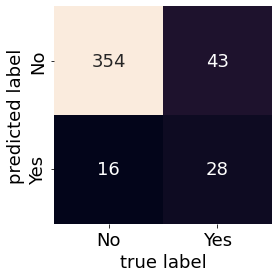

In [339]:
# Confusion Matrix 
# Imbalance dataset 

# Fitting Logistic Regression to the Training set
# Evaluate results

acc = accuracy_score(y_test, lr_test_pred )
prec = precision_score(y_test, lr_test_pred )
rec = recall_score(y_test, lr_test_pred )
f1 = f1_score(y_test, lr_test_pred )
f2 = fbeta_score(y_test, lr_test_pred, beta=2.0)


results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)


# Confusion Matrix Figure (0.5)
mat = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'])


plt.xlabel('true label')
plt.ylabel('predicted label')

Cross Validation

The average accuracy remains very close to the Logistic Regression model accuracy. The model generalizes well.

In [340]:
kfold = model_selection.KFold(n_splits=10)
modelCV =  LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.883


#### <a style="color:blue;">Random Forest</a>

AUC score 

In [341]:
model_roc_auc = roc_auc_score(y_test,rf_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,rf_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,rf_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,rf_train_prob[:,1])

Area under curve (test):  0.8452797868290828 

Area under curve (train):  0.9999999999999999 



Confusion Matrix and Evaluation Metrics

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.866213   0.928571  0.183099  0.305882  0.218121


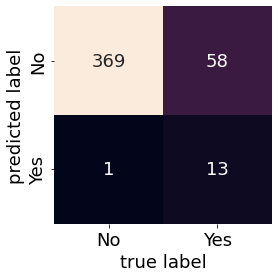

In [342]:
# Confusion Matrix
mat = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, rf_test_pred )
prec = precision_score(y_test, rf_test_pred )
rec = recall_score(y_test, rf_test_pred )
f1 = f1_score(y_test, rf_test_pred )
f2 = fbeta_score(y_test, rf_test_pred, beta=2.0)


results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy remains close to the Random Forest model accuracy. The model generalizes well.

In [343]:
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.854


#### <a style="color:blue;">Decision Tree</a>

AUC score

In [344]:
model_roc_auc = roc_auc_score(y_test,dt_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,dt_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,dt_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,dt_train_prob[:,1])

Area under curve (test):  0.6534449942900646 

Area under curve (train):  1.0 



           Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Decision Tree  0.800454   0.392405  0.43662  0.413333  0.426997


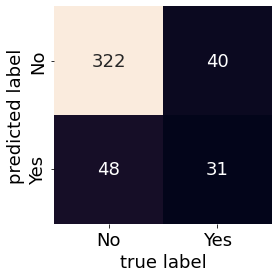

In [345]:
# Confusion Matrix
mat = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, dt_test_pred )
prec = precision_score(y_test, dt_test_pred )
rec = recall_score(y_test, dt_test_pred )
f1 = f1_score(y_test, dt_test_pred )
f2 = fbeta_score(y_test, dt_test_pred, beta=2.0)


results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy do not close to the Decision Tree accuracy. The model do not generalizes well.

In [346]:
kfold = model_selection.KFold(n_splits=10)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.795


**Observation:**

- Based on the **AUC score**, it can observed that Logistic regression has a good score (>0.8) and the difference between train and test score is small compared to the other models. 
- Based on the **accuracy score**, it can observed that both Logistic regression and Random forest has a high accuracy score , which is 0.87.
- Based on the **recall and precision score**, Logistic regression has a better score compare to the other models.
- For cross validation, **K-fold** (10) is applied to measure how good the model fit. It can be observed that both Logistic regression and Random forest generalize well because the value are close to the model average accuracy. 

Thus, based on the justification, **Logistic regression** is selected to predict the employee churn as it has a better model performance. 

#### Feature Importance

#### <a style="color:blue;">Logistic Regression</a>

In [347]:
feature_importances = pd.concat([pd.DataFrame((X_train).columns, columns = ["features"]), pd.DataFrame(np.transpose(lr.fit(X_train, y_train).coef_), columns = ["coef"])],axis = 1)
feature_importances = feature_importances.sort_values("coef", ascending = False)
print(feature_importances.head(5))
print(feature_importances.tail(5))

                        features      coef
12                      OverTime  0.885463
22       YearsSinceLastPromotion  0.507313
20                YearsAtCompany  0.497537
11            NumCompaniesWorked  0.398466
46  JobRole_Sales Representative  0.382545
                     features      coef
8             JobSatisfaction -0.422234
6              JobInvolvement -0.422841
23       YearsWithCurrManager -0.512009
4     EnvironmentSatisfaction -0.516294
43  JobRole_Research Director -0.555141


#### <a style="color:blue;">Random Forest</a>

MonthlyIncome         0.075122
Age                   0.065218
DailyRate             0.055576
OverTime              0.052595
TotalWorkingYears     0.048064
HourlyRate            0.046519
MonthlyRate           0.044142
DistanceFromHome      0.044085
YearsAtCompany        0.035862
NumCompaniesWorked    0.033131
dtype: float64


<AxesSubplot:>

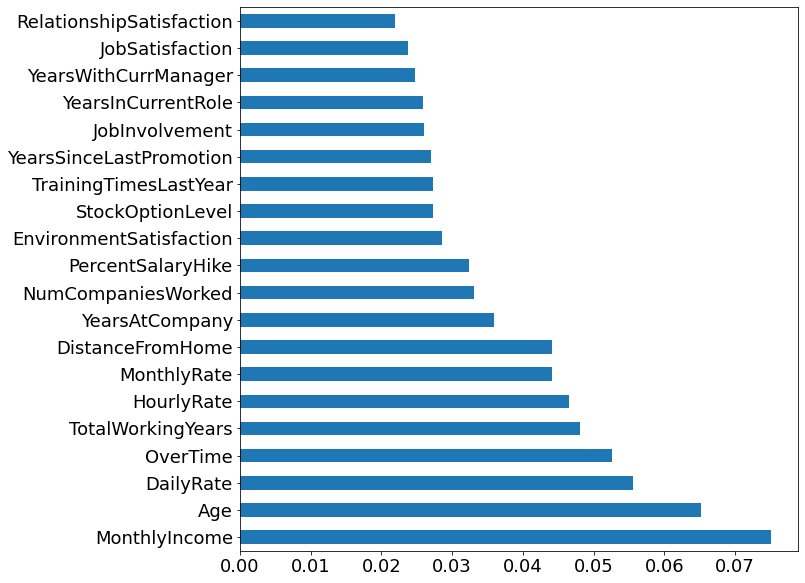

In [348]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

#### <a style="color:blue;">Decision Tree</a>

MonthlyIncome         0.126218
OverTime              0.066798
DailyRate             0.065913
Age                   0.062626
TotalWorkingYears     0.046670
DistanceFromHome      0.046106
MonthlyRate           0.039403
YearsInCurrentRole    0.037171
YearsAtCompany        0.034951
JobInvolvement        0.033615
dtype: float64


<AxesSubplot:>

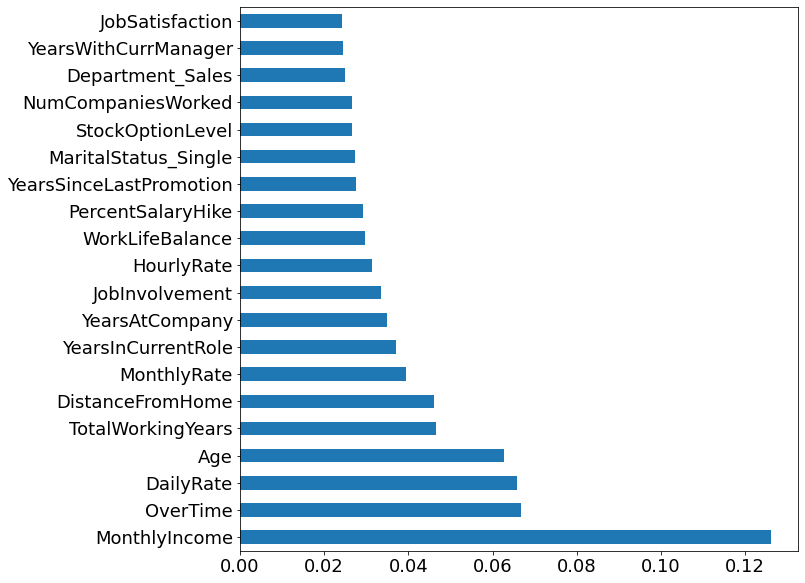

In [349]:
feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

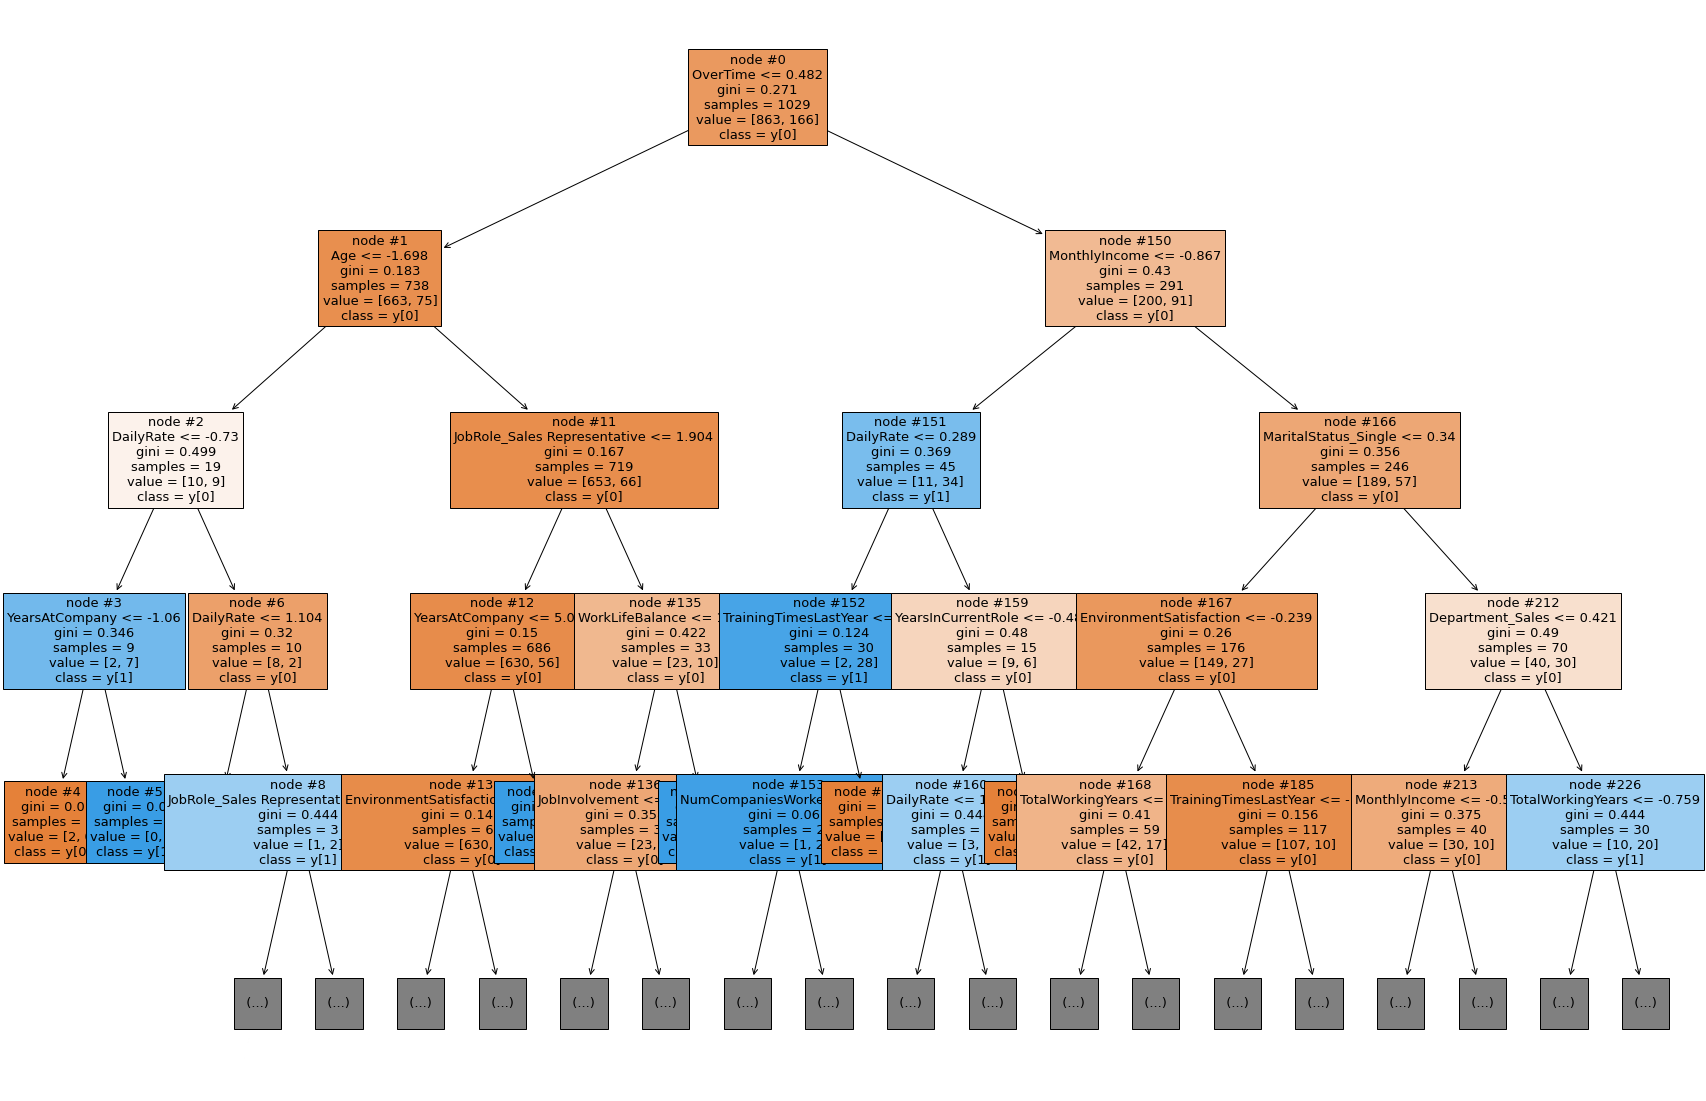

In [350]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=13,node_ids=True,class_names=True)
plt.show()

**Note:** Blue leaves represent the eligible class which is **y[1]** and the orange leaves represent the non-eligible class which is **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

- Employees who **stay at company longer time**, doing overtime with low salaries and less job involvement have a chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who **stay at company shorter time** with a young age, low stock option level and low education level have a high chance of attriting. 

**Observation:**

- As Logistic Regression model is selected, the feature importance of the model will be interpreted. 
- The Top 10 significant variables: overtime, years at company, years since last promotion, number of companies worked, job role, job satisfaction, job involvement, environment satisfaction, years in current role, years with current manager
- Interpretation: 

    i. All the significant variables are affecting the employee to churn. 
    
    ii. Employee will churn because they don't have work life balance (**over time**)
    
    iii. Employee will churn if they are not promoted after a few years (**years since last promotion**) 
    
    iv. If the employee is not satisfied with the job (**job satisfaction**) and environment (**environment satisfaction**), he or she will decided to resign. 
    
    v. If the employees' duration with the company (**years at company**) and current role (**years in current role**)is short, the number of companies worked (**number of companies worked**) tends to be higher, the employee are most probably will churn. 



---

## Conclusion

- Objective 1 is achieved. The relationship between factors and employee churn are identified. 
- Objective 2 is achieved. The significant factors that causes employee churn are determined. 
- Objective 3 is acheived. Churners' characteristics and probability to churn can be predicted by using Logistic Regression model. 


---

## Future Work

#### Working Mode
- The COVID-19 pandemic made working from home (WFH) the new way of working.
- More companies are offering permanent remote and hybrid work. 
- Working mode might become a significant factor of employee churn and leads to the next great distruption. 
- Article:  [Companies offering remote and hybrid work](https://www.cnbc.com/2022/04/13/10-companies-that-switched-to-permanent-hybrid-or-remote-work-and-hiring-right-now.html)

#### Employee Benefits 
- Different companies have different benefits packages. A good benefits package can make employees feel rewarded and appreciated for their work. 
- Nowadays, a good pay is not sufficient to retain a good and talented employee. 
- Benefits might become a significant factor of employee churn.
- Article: [Employers can reduce turnover with the right mix of benefits](https://www.501c.com/employers-can-reduce-turnover-with-the-right-mix-of-benefits/#:~:text=A%20new%20report%20finds%20that,a%20138%25%20decrease%20in%20turnover)

---

## Reference 

- Department of Statistics Malaysia. (2022). Retrieved from Key Statistics of Labour Force in Malaysia 2022: https://www.dosm.gov.my/v1/index.php?r=column/pdfPrev&id=UEpPd3dKQkM2ZVRnVFZ3T0w1d1Zrdz09
- Alhashmi, S. M. (2019). Towards Understanding Employee Attrition using a Decision Tree Approach. Proceeding of 2019 International Conference on Digitization: Landscaping Artificial Intelligence, ICD 2019, 44–47. https://doi.org/10.1109/ICD47981.2019.9105767
- Bandyopadhyay, N., & Jadhav, A. (2021). Churn Prediction of Employees Using Machine Learning Techniques. Tehnički Glasnik, 15(1), 51–59. https://doi.org/10.31803/tg-20210204181812
- El-Rayes, N., Fang, M., Smith, M., & Taylor, S. M. (2020). Predicting employee attrition using tree-based models. International Journal of Organizational Analysis, 28(6), 1273–1291. https://doi.org/10.1108/IJOA-10-2019-1903
- Fallucchi, F., Coladangelo, M., Giuliano, R., & De Luca, E. W. (2020). Predicting employee attrition using machine learning techniques. Computers, 9(4), 1–17. https://doi.org/10.3390/computers9040086
- Habous, A., Nfaoui, E. H., & Oubenaalla, Y. (2021). Predicting Employee Attrition using Supervised Learning Classification Models. 5th International Conference on Intelligent Computing in Data Sciences, ICDS 2021, 0–4. https://doi.org/10.1109/ICDS53782.2021.9626761
- Jain, P. K., Jain, M., & Pamula, R. (2020). Explaining and predicting employees’ attrition: a machine learning approach. SN Applied Sciences, 2(4), 1–11. https://doi.org/10.1007/s42452-020-2519-4
- Pratt, M., Boudhane, M., & Cakula, S. (2021). Employee attrition estimation using random forest algorithm. Baltic Journal of Modern Computing, 9(1), 49–66. https://doi.org/10.22364/BJMC.2021.9.1.04
- Sadana, P., & Munnuru, D. (2022). Machine Learning Model to Predict Work Force Attrition. Lecture Notes in Networks and Systems, 237, 361–376. https://doi.org/10.1007/978-981-16-6407-6_33
- Srivastava, P. R., & Eachempati, P. (2021). Intelligent Employee Retention System for Attrition Rate Analysis and Churn Prediction: An Ensemble Machine Learning and Multi- Criteria Decision-Making Approach. Journal of Global Information Management, 29(6), 1–29. https://doi.org/10.4018/JGIM.20211101.oa23
- Yahia, N. Ben, Hlel, J., & Colomo-Palacios, R. (2021). From Big Data to Deep Data to Support People Analytics for Employee Attrition Prediction. IEEE Access, 9, 60447–60458. https://doi.org/10.1109/ACCESS.2021.3074559

---